**Ted Talk Views Prediction Project by Harish Kollana**


---



Okay, before going to start. Let's understand what is this Tedtalks?

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.


---

**Dataset Information**


*   Number of instances: 4,005
*   Number of attributes: 19


---



**Features information:**

The dataset contains features like:

* talk_id: Talk identification number provided by TED
* title: Title of the talk
* speaker_1: First speaker in TED's speaker list
* all_speakers: Speakers in the talk
* occupations: Occupations of the speakers
* about_speakers: Blurb about each speaker
* recorded_date: Date the talk was recorded
* published_date: Date the talk was published to TED.com
* event: Event or medium in which the talk was given
* native_lang: Language the talk was given in
* available_lang: All available languages (lang_code) for a talk
* comments: Count of comments
* duration: Duration in seconds
* topics: Related tags or topics for the talk
* related_talks: Related talks (key='talk_id',value='title')
* url: URL of the talk
* description: Description of the talk
* transcript: Full transcript of the talk



---




**Target Variable :**
* 'views': Count of views


---



**Goal:**

The goal isto build a model which predicts the views of videos uploaded on the Tedx Youtube Channel based on the past dataset i.e. given to us.

**Breakdown of this Notebook:**

In [172]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

#import libraries for missing value imputation

from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Ted Talks Views Prediction/data_ted_talks.csv')

In [175]:
#check data
df.head()

talk_id  ...                                         transcript
0        1  ...  Thank you so much, Chris. And it's truly a gre...
1       92  ...  About 10 years ago, I took on the task to teac...
2        7  ...  (Music: "The Sound of Silence," Simon & Garfun...
3       53  ...  If you're here today — and I'm very happy that...
4       66  ...  Good morning. How are you? (Audience) Good. It...

[5 rows x 19 columns]

In [176]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [177]:
#check unique values
df.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

In [178]:
#check duplicates
df.duplicated().sum()

0

In [179]:
#check summary statistics
df.describe()


talk_id         views     comments     duration
count   4005.000000  4.005000e+03  3350.000000  4005.000000
mean   12432.538327  2.148006e+06   161.997015   724.011236
std    17447.576262  3.451226e+06   268.838922   361.775462
min        1.000000  0.000000e+00     0.000000    60.000000
25%     1252.000000  8.820690e+05    38.000000   393.000000
50%     2333.000000  1.375508e+06    89.000000   738.000000
75%    23777.000000  2.133110e+06   188.000000   974.000000
max    62794.000000  6.505195e+07  6449.000000  3922.000000

In [180]:
#check missing values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [181]:
#print skewness and kurtosis
print(df.skew())
print(df.kurt())

talk_id     1.421452
views       8.185744
comments    8.865357
duration    1.185608
dtype: float64
talk_id       0.740040
views        98.737918
comments    143.035387
duration      6.849223
dtype: float64


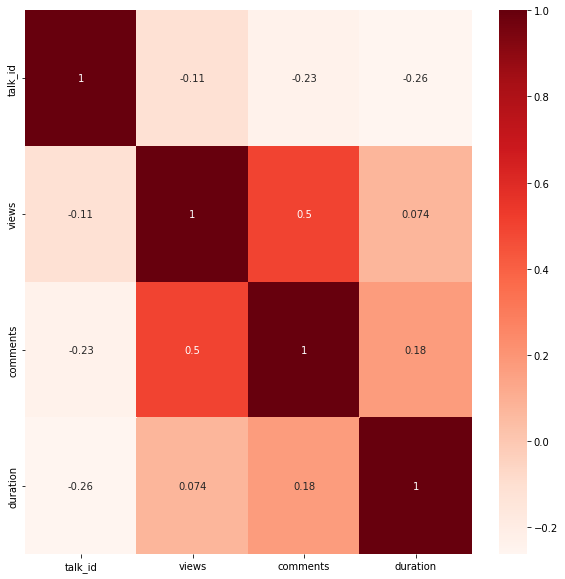

In [182]:
#check correlation with heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


title column

In [183]:

#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 in the combination of all letters


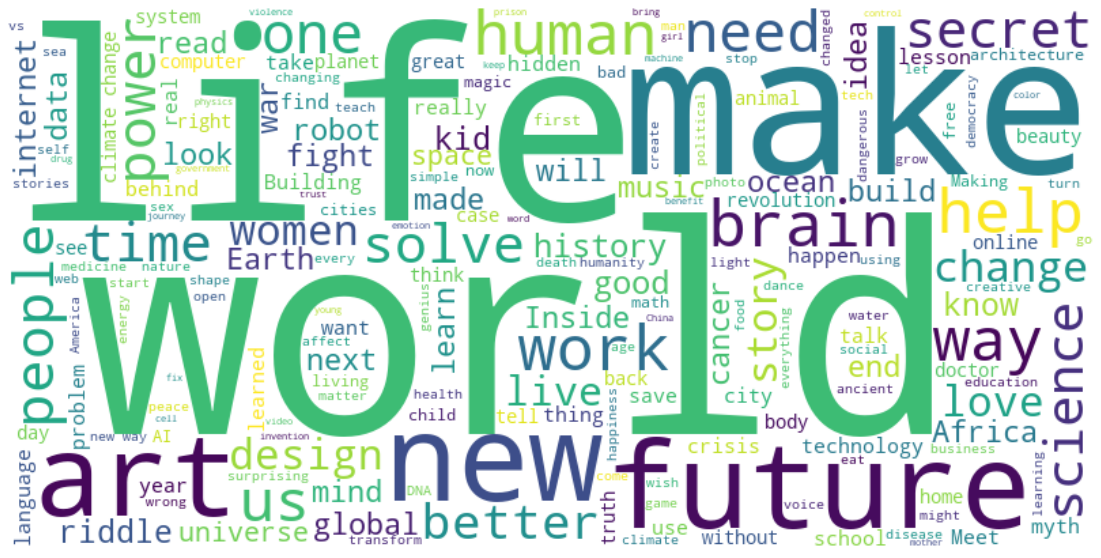

In [184]:
#convert the title column to string and save it in title_str
title_str = ' '.join(df['title'].values)

#print the length of title_str
print("There are {} in the combination of all letters".format(len(title_str)))

#make a wordcloud of the most common words in the title_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(title_str)

#plot the wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

title column and speakers column

In [185]:
#find top 10 most viewed titles vs views with only title,speaker_1 and views columns
df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10)

title  ...     views
4                           Do schools kill creativity?  ...  65051954
1296           Your body language may shape who you are  ...  57074270
2062  This is what happens when you reply to spam email  ...  56932551
646                    How great leaders inspire action  ...  49730580
796                          The power of vulnerability  ...  47544833
1724         How to speak so that people want to listen  ...  41504331
2108         Inside the mind of a master procrastinator  ...  37976820
1366  Looks aren't everything. Believe me, I'm a model.  ...  33874546
2724                     My philosophy for a happy life  ...  33691484
1898                 The next outbreak? We're not ready  ...  33521780

[10 rows x 3 columns]

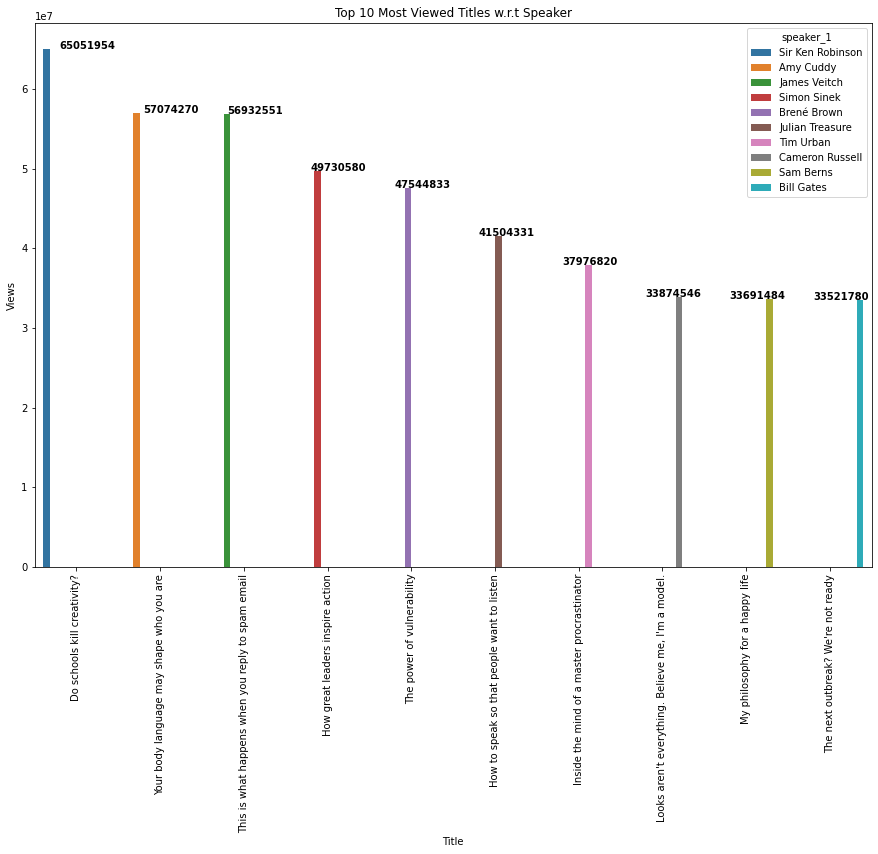

In [186]:
#set figure size
plt.figure(figsize=(15,10))

# seaborn barplot top 10 most viewed titles vs views with only title,speaker-1 and views columns with title as x-axis and views as y-axis and color as speaker_1
sns.barplot(x='title', y='views', hue='speaker_1', data=df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10))

#set bar label
plt.xlabel('Title')
plt.ylabel('Views')

#set hue label
plt.title('Top 10 Most Viewed Titles w.r.t Speaker')

#set x tick label rotation
plt.xticks(rotation=90)

#show view count on top of each bar
for i, v in enumerate(df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+200, str(v), color='black', fontweight='bold')


plt.show()


popular speaker

In [187]:
#find top 15 speaker_1 with most number of views
top_15_speak_views = df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
top_15_speak_views.head()

speaker_1      views
0      Alex Gendler  117619583
1  Sir Ken Robinson   84380518
2      James Veitch   78843641
3       Simon Sinek   62661183
4       Brené Brown   61285977

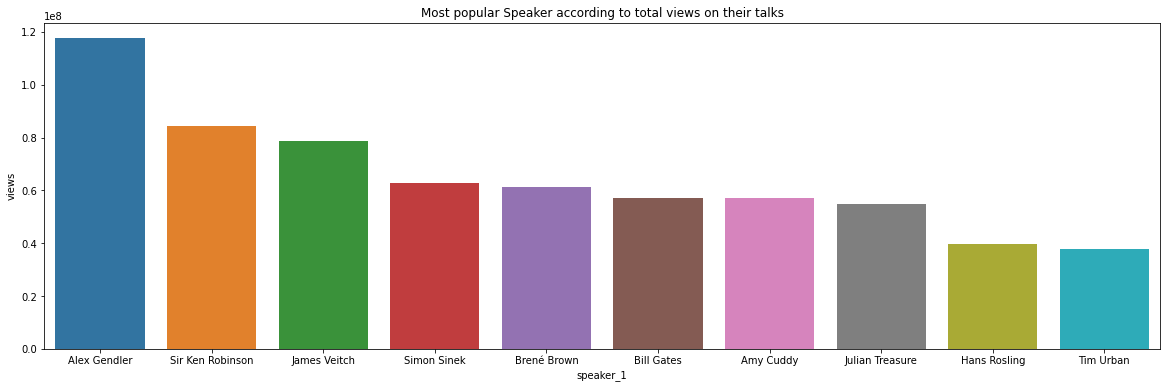

In [188]:
#printing most popular Speaker according to total views on their talks
plt.figure(figsize=(20,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=top_15_speak_views)

all speakers column

In [189]:
#extract records with columns title,speaker_1,views and all_speakers
df_all_speakers = df[['title','speaker_1','views','all_speakers']]
df_all_speakers.head()

title  ...             all_speakers
0      Averting the climate crisis  ...           {0: 'Al Gore'}
1  The best stats you've ever seen  ...      {0: 'Hans Rosling'}
2                 Simplicity sells  ...       {0: 'David Pogue'}
3              Greening the ghetto  ...     {0: 'Majora Carter'}
4      Do schools kill creativity?  ...  {0: 'Sir Ken Robinson'}

[5 rows x 4 columns]

In [190]:
#drop missing values in all_speakers column with value 'nan' and all records with missing values in all_speakers column
df_all_speakers.dropna(subset=['all_speakers'], inplace=True)
df_all_speakers.head()

title  ...             all_speakers
0      Averting the climate crisis  ...           {0: 'Al Gore'}
1  The best stats you've ever seen  ...      {0: 'Hans Rosling'}
2                 Simplicity sells  ...       {0: 'David Pogue'}
3              Greening the ghetto  ...     {0: 'Majora Carter'}
4      Do schools kill creativity?  ...  {0: 'Sir Ken Robinson'}

[5 rows x 4 columns]

In [191]:
#check nan values in all_speakers column
df_all_speakers.isnull().sum()

title           0
speaker_1       0
views           0
all_speakers    0
dtype: int64

In [192]:
#convrt all_speakers column values to dictionary
df_all_speakers['all_speakers'] = df_all_speakers['all_speakers'].apply(lambda x: eval(x))
df_all_speakers

title  ...                 all_speakers
0                          Averting the climate crisis  ...               {0: 'Al Gore'}
1                      The best stats you've ever seen  ...          {0: 'Hans Rosling'}
2                                     Simplicity sells  ...           {0: 'David Pogue'}
3                                  Greening the ghetto  ...         {0: 'Majora Carter'}
4                          Do schools kill creativity?  ...      {0: 'Sir Ken Robinson'}
...                                                ...  ...                          ...
4000       Crisis support for the world, one text away  ...          {0: 'Nancy Lublin'}
4001                      The dark history of IQ tests  ...   {0: 'Stefan C Dombrowski'}
4002  How "policing for profit" undermines your rights  ...  {0: 'Dick M. Carpenter II'}
4003      The electrifying speeches of Sojourner Truth  ...     {0: 'Daina Ramey Berry'}
4004              The most important anus in the ocean  ...          {0: 'Cella Wright'}

[4001 rows x 4 columns]

In [193]:
#apply pd.series to all_speakers column
df_all_speakers['all_speakers'].apply(pd.Series)

0    1    2    3    4
0                  Al Gore  NaN  NaN  NaN  NaN
1             Hans Rosling  NaN  NaN  NaN  NaN
2              David Pogue  NaN  NaN  NaN  NaN
3            Majora Carter  NaN  NaN  NaN  NaN
4         Sir Ken Robinson  NaN  NaN  NaN  NaN
...                    ...  ...  ...  ...  ...
4000          Nancy Lublin  NaN  NaN  NaN  NaN
4001   Stefan C Dombrowski  NaN  NaN  NaN  NaN
4002  Dick M. Carpenter II  NaN  NaN  NaN  NaN
4003     Daina Ramey Berry  NaN  NaN  NaN  NaN
4004          Cella Wright  NaN  NaN  NaN  NaN

[4001 rows x 5 columns]

In [194]:
#create a new df and concat the pd.series to all_speakers column
df_all_speakers_new=pd.concat([df_all_speakers.drop(['all_speakers'], axis=1), df_all_speakers['all_speakers'].apply(pd.Series)], axis=1)
df_all_speakers_new.head()

title         speaker_1     views  ...    2    3    4
0      Averting the climate crisis           Al Gore   3523392  ...  NaN  NaN  NaN
1  The best stats you've ever seen      Hans Rosling  14501685  ...  NaN  NaN  NaN
2                 Simplicity sells       David Pogue   1920832  ...  NaN  NaN  NaN
3              Greening the ghetto     Majora Carter   2664069  ...  NaN  NaN  NaN
4      Do schools kill creativity?  Sir Ken Robinson  65051954  ...  NaN  NaN  NaN

[5 rows x 8 columns]

In [195]:
#rename column 0 to all_speakers in df_all_speakers_new
df_all_speakers_new.rename(columns={0:'all_speakers'}, inplace=True)
df_all_speakers_new.head()

title         speaker_1     views  ...    2    3    4
0      Averting the climate crisis           Al Gore   3523392  ...  NaN  NaN  NaN
1  The best stats you've ever seen      Hans Rosling  14501685  ...  NaN  NaN  NaN
2                 Simplicity sells       David Pogue   1920832  ...  NaN  NaN  NaN
3              Greening the ghetto     Majora Carter   2664069  ...  NaN  NaN  NaN
4      Do schools kill creativity?  Sir Ken Robinson  65051954  ...  NaN  NaN  NaN

[5 rows x 8 columns]

In [196]:
df_all_speakers_new.columns

Index(['title', 'speaker_1', 'views', 'all_speakers', 1, 2, 3, 4], dtype='object')

In [197]:
#check data in all_speakers_new column
df_all_speakers_new.head()

title         speaker_1     views  ...    2    3    4
0      Averting the climate crisis           Al Gore   3523392  ...  NaN  NaN  NaN
1  The best stats you've ever seen      Hans Rosling  14501685  ...  NaN  NaN  NaN
2                 Simplicity sells       David Pogue   1920832  ...  NaN  NaN  NaN
3              Greening the ghetto     Majora Carter   2664069  ...  NaN  NaN  NaN
4      Do schools kill creativity?  Sir Ken Robinson  65051954  ...  NaN  NaN  NaN

[5 rows x 8 columns]

In [198]:
#drop columns 1,2,3,4 in df_all_speakers_new
df_all_speakers_new.drop([ 1, 2, 3, 4], axis=1, inplace=True)
df_all_speakers_new.head()

title  ...      all_speakers
0      Averting the climate crisis  ...           Al Gore
1  The best stats you've ever seen  ...      Hans Rosling
2                 Simplicity sells  ...       David Pogue
3              Greening the ghetto  ...     Majora Carter
4      Do schools kill creativity?  ...  Sir Ken Robinson

[5 rows x 4 columns]

In [199]:
#check data in df_all_speakers_new column
df_all_speakers_new.head()

title  ...      all_speakers
0      Averting the climate crisis  ...           Al Gore
1  The best stats you've ever seen  ...      Hans Rosling
2                 Simplicity sells  ...       David Pogue
3              Greening the ghetto  ...     Majora Carter
4      Do schools kill creativity?  ...  Sir Ken Robinson

[5 rows x 4 columns]

In [200]:
#check whether values of speaker_1 column are same as values of all_speakers column and show count of matching records

matching_records =df_all_speakers_new['speaker_1'] == df_all_speakers_new['all_speakers']
matching_records.value_counts()


True    4001
dtype: int64

In [201]:
#check data info in df_all_speakers_new column
df_all_speakers_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4004
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4001 non-null   object
 1   speaker_1     4001 non-null   object
 2   views         4001 non-null   int64 
 3   all_speakers  4001 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.3+ KB


so all the values in columns of speaker_1 and all_speakers are same. so we can drop that column

occupations column

In [202]:
#find number of values in occupations column in df
df['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                              NaN
4002                          {0: ['law researcher']}
4003                                              NaN
4004                                              NaN
Name: occupations, Length: 4005, dtype: object

In [203]:
#check null values in occupations column
df['occupations'].isnull().sum()

522

In [204]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})


In [205]:
#apply eval function to occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [206]:
#check null values in occupations column
df['occupations'].isnull().sum()

0

In [207]:
#defining a new feature called occupation
df['occupation'] = 'other'

#for loop to iterate through each row and extracting occupations of speakers
for index, row in df.iterrows():
    occupations_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occupations_list)

In [208]:
#check data in occupation column
df['occupation'].head()

0                        climate advocate
1    global health expert; data visionary
2                    technology columnist
3      activist for environmental justice
4                                  author
Name: occupation, dtype: object

In [209]:
#check count of unique values in occupation column
df['occupation'].nunique()


1552

In [210]:
#create a df where ocuuptation column is not o
df_occupation = df[df['occupation']!='O'] 
df_occupation.head()

talk_id  ...                            occupation
0        1  ...                      climate advocate
1       92  ...  global health expert; data visionary
2        7  ...                  technology columnist
3       53  ...    activist for environmental justice
4       66  ...                                author

[5 rows x 20 columns]

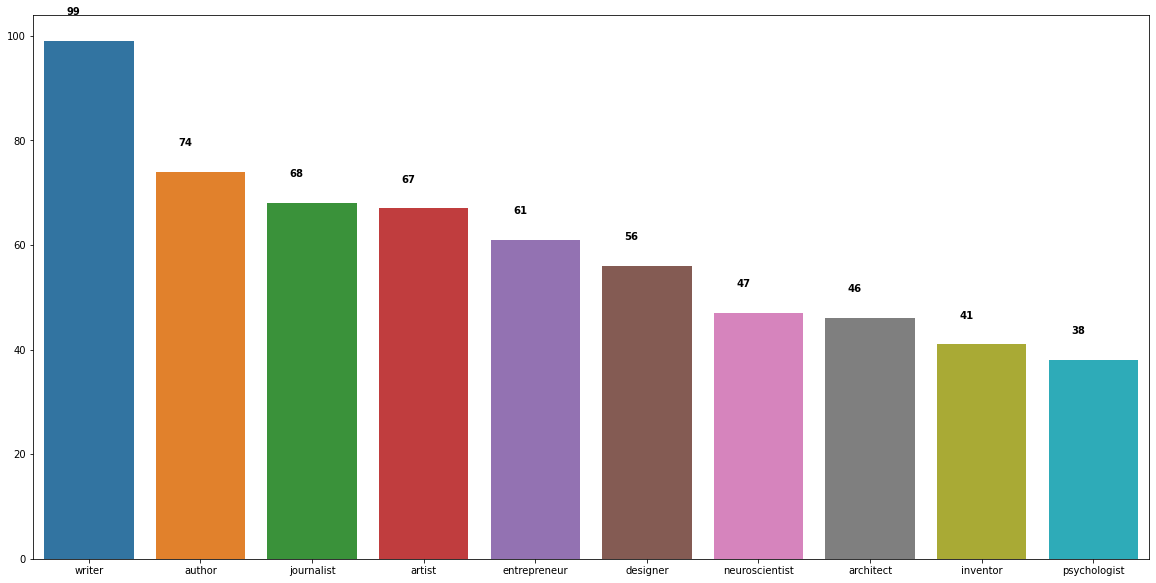

In [211]:
x=df_occupation['occupation'].value_counts(ascending=False).head(10).index
y=df_occupation['occupation'].value_counts(ascending=False).head(10).values

#set figure size
plt.figure(figsize=(20,10))

#show the values of x in top of each bar
for i, v in enumerate(y):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')

sns.barplot(x=x, y=y)

In [212]:
#print ocuuptation column value count of top 10 occupations
df_occupation['occupation'].value_counts(ascending=False).head(10)


writer            99
author            74
journalist        68
artist            67
entrepreneur      61
designer          56
neuroscientist    47
architect         46
inventor          41
psychologist      38
Name: occupation, dtype: int64

There are 55651 words in the combination of all occupations


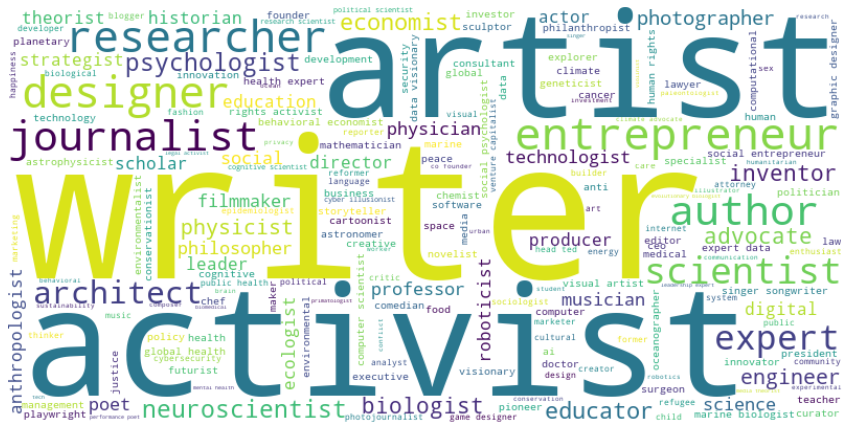

In [213]:
#convert the topic scolumn to string and save it in occupation_str
occupation_str = ' '.join(df_occupation['occupation'].values.astype(str))

#print the length of topic_str
print("There are {} words in the combination of all occupations".format(len(occupation_str)))

#make a wordcloud of the most common words in the topic_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(occupation_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

published date column

In [214]:
#apply striptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [215]:
#extract year from published_date column and save it as year
df['pub_year'] = df['published_date'].apply(lambda x: x.year)

#extract month from published_date column and save it as month
df['pub_month'] = df['published_date'].apply(lambda x: x.month)

#extract weekday from published_date column and save it as pub_weekday
df['pub_weekday'] = df['published_date'].apply(lambda x: x.weekday())

In [216]:
df.head()

talk_id                            title  ... pub_month pub_weekday
0        1      Averting the climate crisis  ...         6           1
1       92  The best stats you've ever seen  ...         6           1
2        7                 Simplicity sells  ...         6           1
3       53              Greening the ghetto  ...         6           1
4       66      Do schools kill creativity?  ...         6           1

[5 rows x 23 columns]

In [217]:
#map weekdays to numbers
weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

#map weekday_map to pub_weekday column
df['pub_weekday'] = df['pub_weekday'].map(weekday_map)

In [218]:
df['pub_weekday']

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
4000      Monday
4001      Monday
4002     Tuesday
4003    Thursday
4004    Thursday
Name: pub_weekday, Length: 4005, dtype: object

day column

In [219]:
#checking the day of the month having maximum release date 
freq_pub_day=df[['pub_weekday','views']].groupby('pub_weekday').agg({'views' : 'count'})
freq_pub_day=freq_pub_day.sort_values('views',ascending=False)
freq_pub_day.reset_index(inplace=True)
freq_pub_day

pub_weekday  views
0     Tuesday    857
1    Thursday    832
2      Friday    789
3      Monday    727
4   Wednesday    703
5      Sunday     55
6    Saturday     42

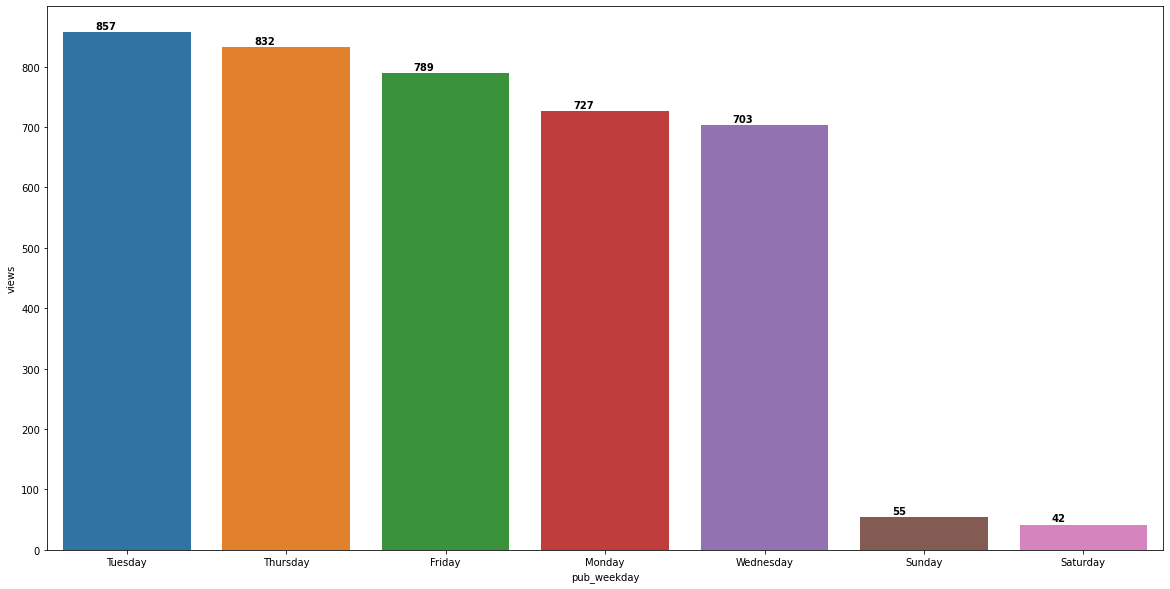

In [220]:
#create a bar plot of the day of the month having maximum release date
plt.figure(figsize=(20,10))
sns.barplot(x=freq_pub_day['pub_weekday'], y=freq_pub_day['views'])

#show thw count of views at the top of each bar
for i, v in enumerate(freq_pub_day['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')


Pub_weekday w.r.t Average Views

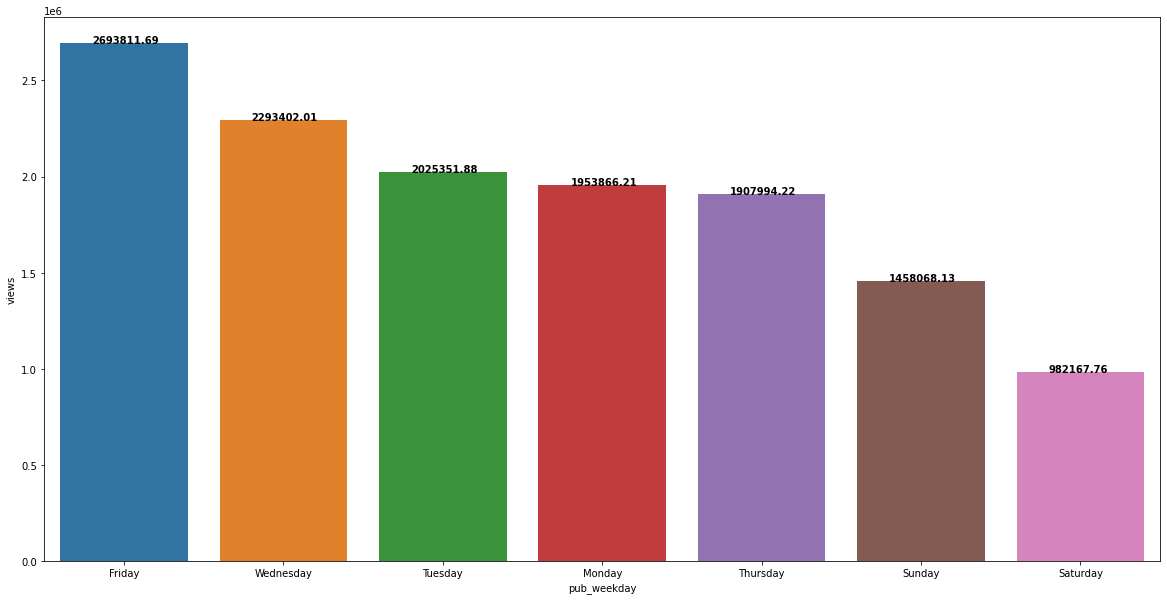

In [221]:
#create a df with pub_weekday column and mean of views column
df_pub_weekday_mean = df[['pub_weekday','views']].groupby('pub_weekday').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_weekday_mean['views'] = df_pub_weekday_mean['views'].round(2)

#sort the df_pub_weekday_mean by mean of views column
df_pub_weekday_mean=df_pub_weekday_mean.sort_values('views',ascending=False)

#reset index of df_pub_weekday_mean
df_pub_weekday_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_weekday_mean['pub_weekday'], y=df_pub_weekday_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_weekday_mean['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')
    


month column

In [222]:
#create a dictionary with month number as key and month name as value
month_dict = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#map month_dict to pub_month column
df['pub_month'] = df['pub_month'].map(month_dict)


In [223]:
#check pub_month column
df['pub_month'].head()

0    June
1    June
2    June
3    June
4    June
Name: pub_month, dtype: object

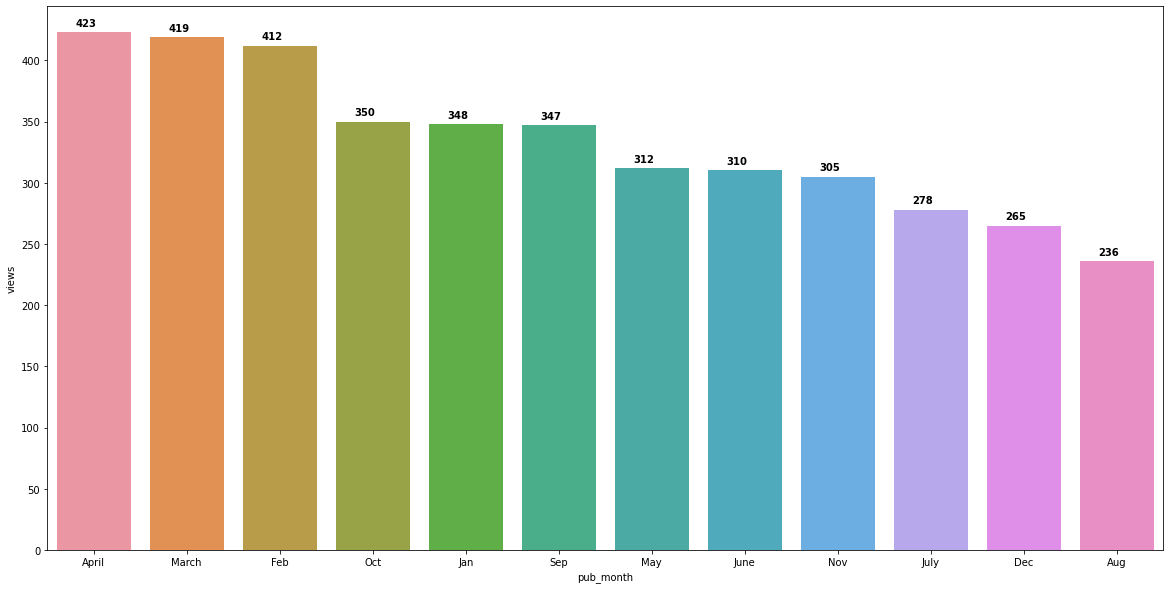

In [224]:
#create a df with pub_month column and count of views column
df_pub_month_count = df[['pub_month','views']].groupby('pub_month').agg({'views' : 'count'})

#sort the df_pub_month_count by count of views column
df_pub_month_count=df_pub_month_count.sort_values('views',ascending=False)

#reset index of df_pub_month_count
df_pub_month_count.reset_index(inplace=True)

#create a bar plot of the count of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_month_count['pub_month'], y=df_pub_month_count['views'])

#show the count of views at the top of each bar
for i, v in enumerate(df_pub_month_count['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')

pub_month w.r.t to average views

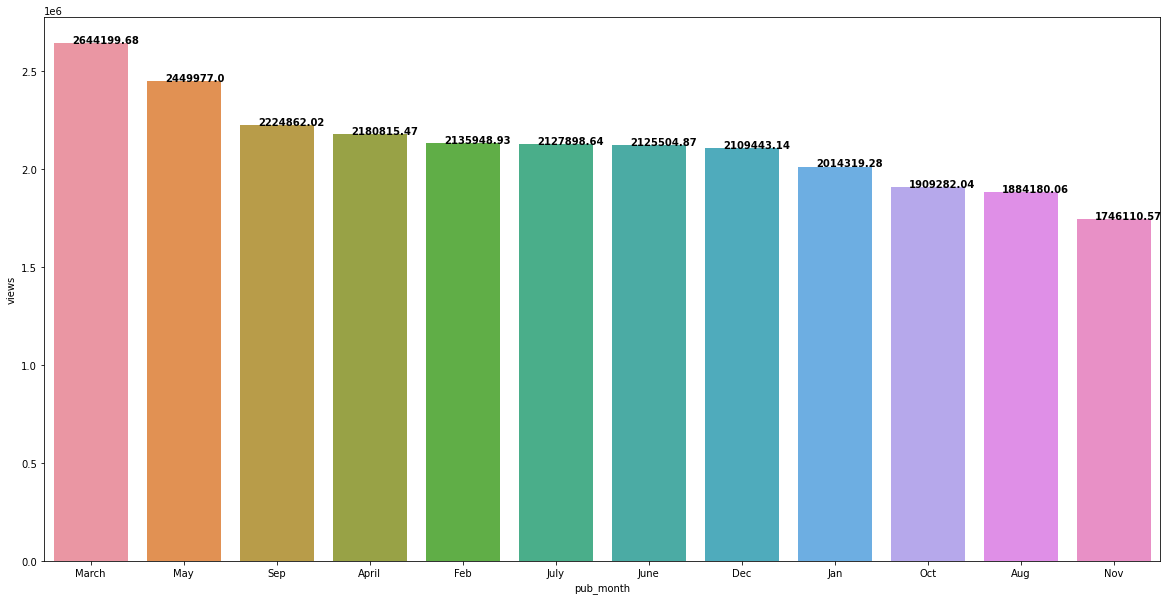

In [225]:
#create a df with pub_month column and mean of views column
df_pub_month_mean = df[['pub_month','views']].groupby('pub_month').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_month_mean['views'] = df_pub_month_mean['views'].round(2)

#sort the df_pub_month_mean by mean of views column
df_pub_month_mean=df_pub_month_mean.sort_values('views',ascending=False)

#reset index of df_pub_month_mean
df_pub_month_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_month_mean['pub_month'], y=df_pub_month_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_month_mean['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')
    

Year Column

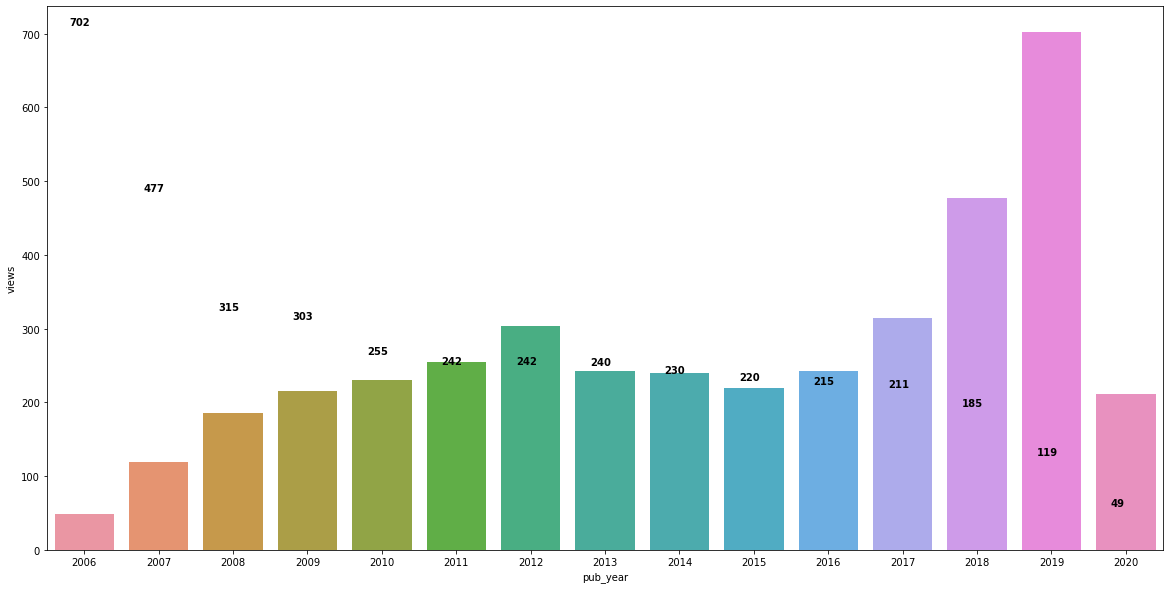

In [226]:
#create a df with pub_year column and count of views column
df_pub_year_count = df[['pub_year','views']].groupby('pub_year').agg({'views' : 'count'})

#sort the df_pub_year_count by count of views column
df_pub_year_count=df_pub_year_count.sort_values('views',ascending=False)

#reset index of df_pub_year_count
df_pub_year_count.reset_index(inplace=True)

#create a bar plot of the count of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_year_count['pub_year'], y=df_pub_year_count['views'])

#show the count of views at the top of each bar
for i, v in enumerate(df_pub_year_count['views']):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')


year avg w.r.t views

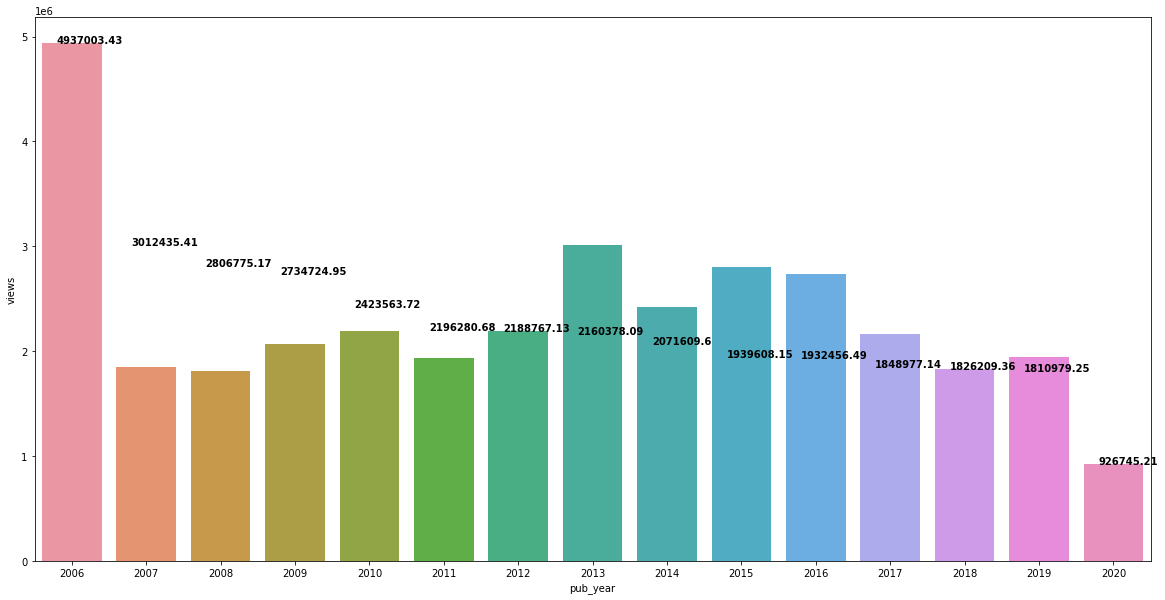

In [227]:
#create a df with pub_year column and mean of views column
df_pub_year_mean = df[['pub_year','views']].groupby('pub_year').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_year_mean['views'] = df_pub_year_mean['views'].round(2)

#sort the df_pub_year_mean by mean of views column
df_pub_year_mean=df_pub_year_mean.sort_values('views',ascending=False)

#reset index of df_pub_year_mean
df_pub_year_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_year_mean['pub_year'], y=df_pub_year_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_year_mean['views']):
    plt.text(i-0.2, v+30, str(v), color='black', fontweight='bold')



event column

In [228]:
#find top 10 event_name with most number of views with column event and views
top_10_event_views = df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
top_10_event_views.reset_index(inplace=True)
top_10_event_views


event  views
0   TED-Ed    556
1  TED2017     96
2  TED2018     96
3  TED2019     91
4  TED2014     84
5  TED2009     81
6  TED2013     75
7  TED2015     75
8  TED2016     75
9  TED2011     70

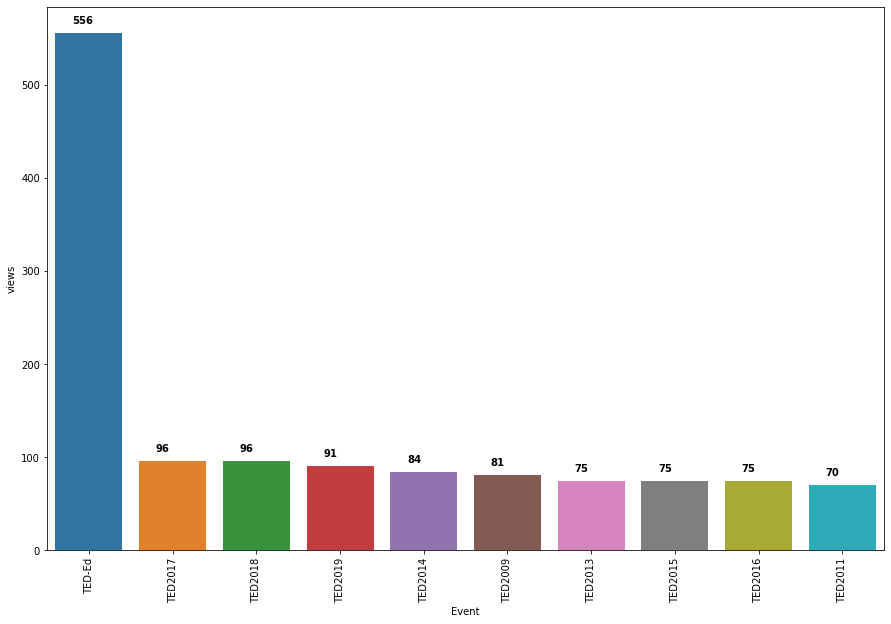

In [229]:
#set figure size
plt.figure(figsize=(15,10))

# seaborn barplot top 10 values in event column with event as x-axis and views as y-axis and color as event
sns.barplot(x='event', y='views', data=top_10_event_views[['event','views']].sort_values(by='views', ascending=False).head(10))

#set rotation of x-axis labels
plt.xticks(rotation=90)

#set bar label
plt.xlabel('Event')

#show view count on top of each bar
for i, v in enumerate(top_10_event_views[['event','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')


In [230]:
#find most popular event according to total views on their talks
top_10_pop_event_views = df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_pop_event_views.reset_index(inplace=True)
top_10_pop_event_views

event       views
0          TED-Ed  1145357780
1         TED2015   247702961
2         TED2014   240295871
3  TEDGlobal 2013   235410234
4         TED2017   227847725
5         TED2016   227358612
6         TED2013   225967516
7         TED2012   197746106
8         TED2018   196346377
9         TED2009   191190144

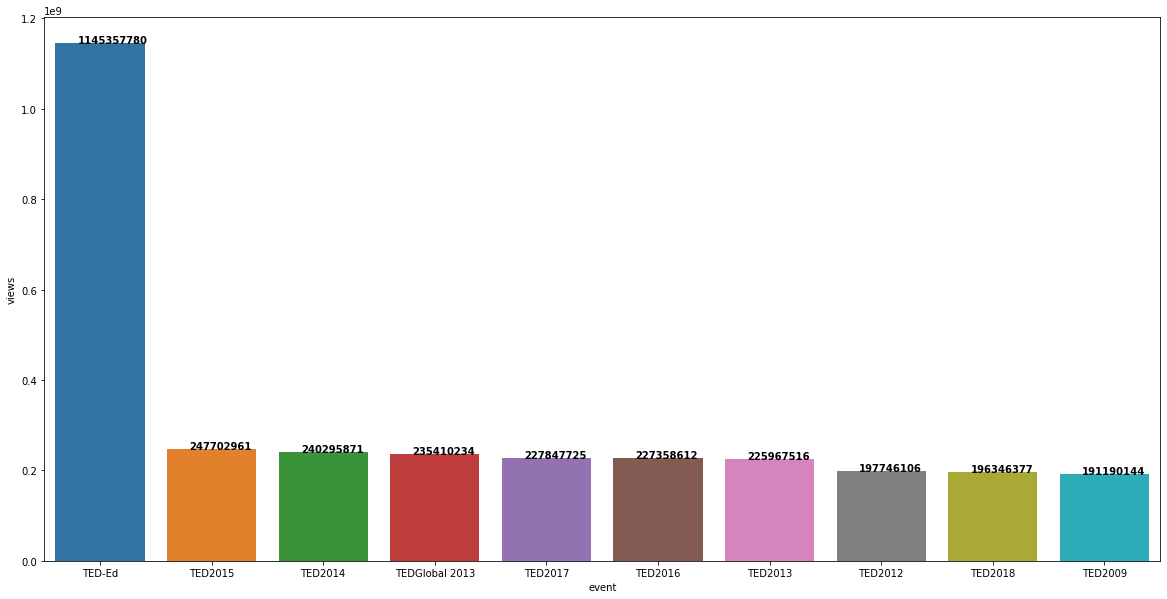

In [231]:
#set figure size
plt.figure(figsize=(20,10))

# seaborn barplot top 10 values in event column with event as x-axis and views as y-axis
sns.barplot(x='event', y='views', data=top_10_pop_event_views[['event','views']].sort_values(by='views', ascending=False).head(10))

#show view count on top of each bar
for i, v in enumerate(top_10_pop_event_views[['event','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+300, str(v), color='black', fontweight='bold')

In [232]:
#extract records of native_lang column counts in df
df['native_lang'].value_counts()


en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

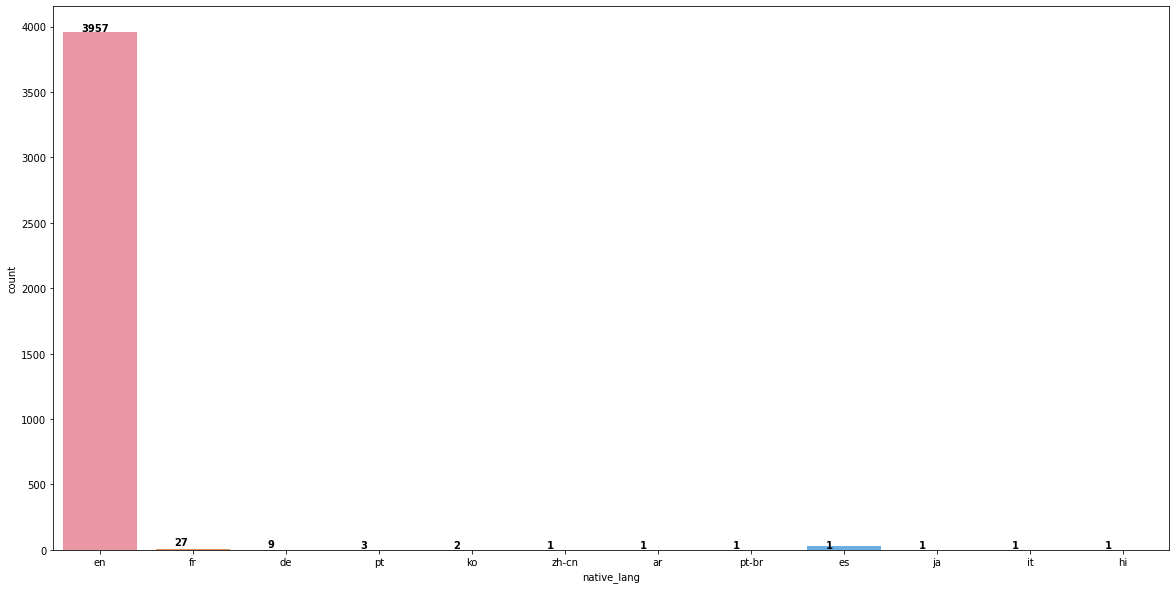

In [233]:
#plot countplot of native_lang column in df
plt.figure(figsize=(20,10))
sns.countplot(x='native_lang', data=df)

#show count of each language in native_lang column
for i, v in enumerate(df['native_lang'].value_counts()):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')



topic column

There are 404126 words in the combination of all topics


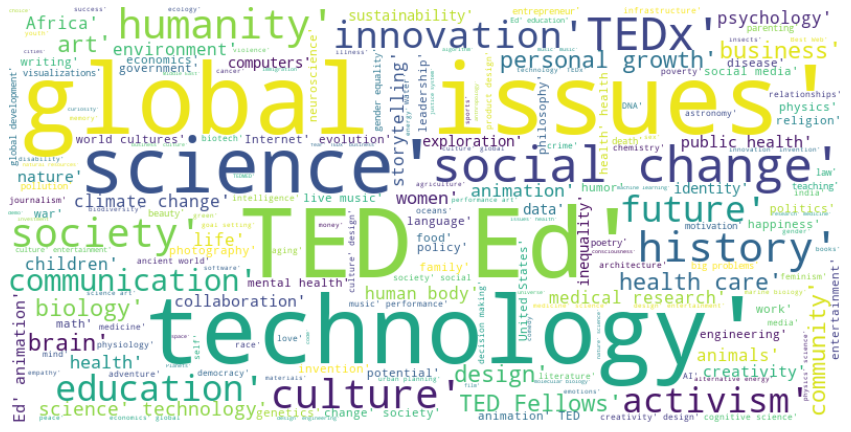

In [234]:

#convert the topic scolumn to string and save it in title_str
topic_str = ' '.join(df['topics'].values.astype(str))

#print the length of topic_str
print("There are {} words in the combination of all topics".format(len(topic_str)))

#make a wordcloud of the most common words in the topic_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(topic_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

available languages

There are 647690 words in the combination of all available languages


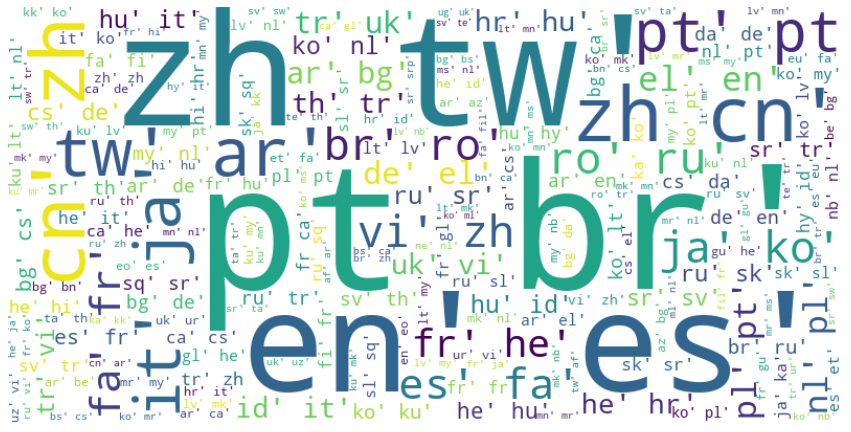

In [235]:
#convert the available_lang as string and save it in lang_str
lang_str = ' '.join(df['available_lang'].values.astype(str))

#print the length of lang_str
print("There are {} words in the combination of all available languages".format(len(lang_str)))

#make a wordcloud of the most common words in the lang_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(lang_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

related_talks column

In [236]:
#check related_talks column type
df['related_talks'].dtypes

dtype('O')

In [237]:
#check null values in occupations column
df['related_talks'].isnull().sum()

0

In [238]:
#apply eval function to occupations column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [239]:
#check null values in occupations column
df['related_talks'].isnull().sum()

0

In [240]:
#check related_talks column 1st row
df['related_talks'].iloc[0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [241]:
related_talks_keys_list=[]
related_talks_values_list=[]


for i in range(0,len(df['related_talks'])):
    related_talks_dict = df['related_talks'].iloc[i]
    for key, value in related_talks_dict.items():
        
        #save the keys as a list
        related_talks_keys_list += list(related_talks_dict.keys())

        #save the values as a list
        related_talks_values_list += list(related_talks_dict.values())
    

In [242]:
#create a dataframe with related_talks_keys_list as index and related_talks_values_list as values
df_related_talks = pd.DataFrame({'related_talks_keys':related_talks_keys_list,'related_talks_values':related_talks_values_list})

In [243]:
df_related_talks

related_talks_keys                               related_talks_values
0                      243                 New thinking on the climate crisis
1                      547               The business logic of sustainability
2                     2093  The state of the climate — and what we might d...
3                    54715                How we can turn the tide on climate
4                    29968  The most important thing you can do to fight c...
...                    ...                                                ...
143092               29159                 Inside the killer whale matriarchy
143093               45539                 How turtle shells evolved... twice
143094               17733  Let's turn the high seas into the world's larg...
143095                1011                        Making law on the high seas
143096               41226                  The lovable (and lethal) sea lion

[143097 rows x 2 columns]

In [244]:
#create a new df and add df and df_related_talks
df_related_talks_final = pd.concat([df, df_related_talks], axis=1)
df_related_talks_final

talk_id  ...                               related_talks_values
0           1.0  ...                 New thinking on the climate crisis
1          92.0  ...               The business logic of sustainability
2           7.0  ...  The state of the climate — and what we might d...
3          53.0  ...                How we can turn the tide on climate
4          66.0  ...  The most important thing you can do to fight c...
...         ...  ...                                                ...
143092      NaN  ...                 Inside the killer whale matriarchy
143093      NaN  ...                 How turtle shells evolved... twice
143094      NaN  ...  Let's turn the high seas into the world's larg...
143095      NaN  ...                        Making law on the high seas
143096      NaN  ...                  The lovable (and lethal) sea lion

[143097 rows x 25 columns]

In [245]:
#drop related_talks column
df_related_talks_final.drop(['related_talks'], axis=1, inplace=True)

In [246]:
#rename columns of related_talks_keys and related_talks_values
df_related_talks_final.rename(columns={'related_talks_keys':'related_talks_serial','related_talks_values':'related_talks'}, inplace=True)

In [247]:
# check df_related_talks_final dataframe
df_related_talks_final.head()

talk_id  ...                                      related_talks
0      1.0  ...                 New thinking on the climate crisis
1     92.0  ...               The business logic of sustainability
2      7.0  ...  The state of the climate — and what we might d...
3     53.0  ...                How we can turn the tide on climate
4     66.0  ...  The most important thing you can do to fight c...

[5 rows x 24 columns]

There are 13 words in the combination of all letters


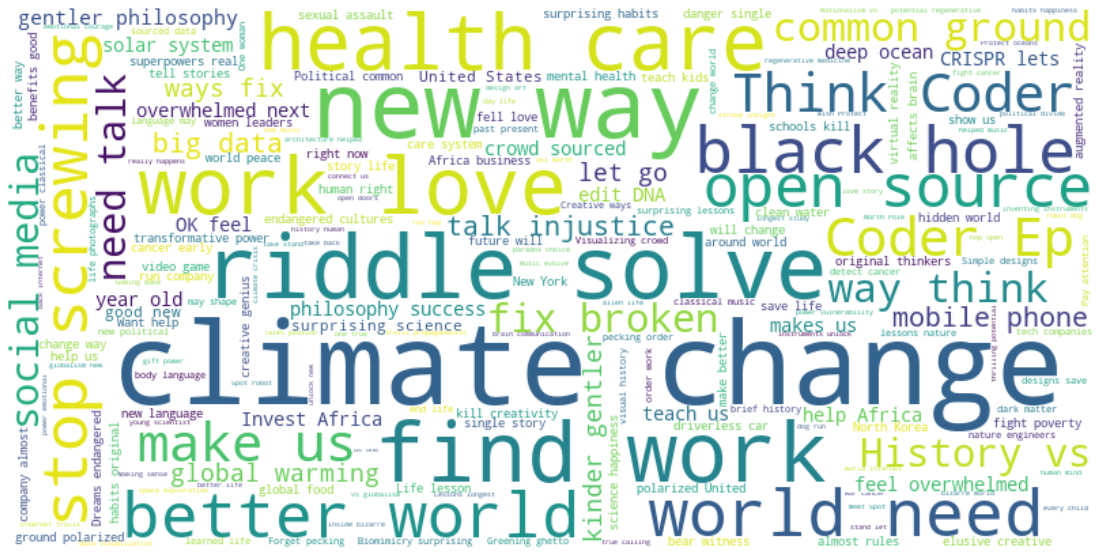

In [248]:
#convert the related_talks column to string and save it in rt_str
rt_str = ' '.join(df_related_talks_final['related_talks'].values)

#print the length of title_str
print("There are {} words in the combination of all letters".format(len('related_talks')))

#make a wordcloud of the most common words in the title_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(rt_str)

#plot the wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

title column and speakers column

In [249]:
#find top 10 most viewed related_talks vs views with only title,speaker_1 and views columns
df_related_talks_final[['related_talks','speaker_1','views']].sort_values(by='views', ascending=False).head(10)

related_talks  ...       views
4     The most important thing you can do to fight c...  ...  65051954.0
1296                   Inside the world's deepest caves  ...  57074270.0
2062                    Once upon a time, my mother ...  ...  56932551.0
646                Creative houses from reclaimed stuff  ...  49730580.0
796   3 ways to build a happy marriage and avoid div...  ...  47544833.0
1724                How the news distorts our worldview  ...  41504331.0
2108                Designing objects that tell stories  ...  37976820.0
1366                          My trek to the South Pole  ...  33874546.0
2724                                       "Thula Mama"  ...  33691484.0
1898                                     Where is home?  ...  33521780.0

[10 rows x 3 columns]

In [250]:
#check any duplicates in related_talks column
df_related_talks_final['related_talks'].duplicated().sum()

139275

In [251]:
#df_related_talks value counts
df_related_talks_final['related_talks'].value_counts()

How to find work you love                              484
How to stop screwing yourself over                     311
We need to talk about an injustice                     246
A kinder, gentler philosophy of success                228
It's OK to feel overwhelmed. Here's what to do next    210
                                                      ... 
"Chromatic"                                              3
"Autopilote" / "Pumper"                                  3
The "dead zone" of the Gulf of Mexico                    3
Food revolutionaries                                     3
Go ahead, dream about the future                         2
Name: related_talks, Length: 3822, dtype: int64

In [252]:
#let's find the most frequent related talks categories
freq_talks_df=pd.DataFrame(df_related_talks_final['related_talks'].value_counts()).reset_index().nlargest(10, 'related_talks')
freq_talks_df

index  related_talks
0                          How to find work you love            484
1                 How to stop screwing yourself over            311
2                 We need to talk about an injustice            246
3            A kinder, gentler philosophy of success            228
4  It's OK to feel overwhelmed. Here's what to do...            210
5         The surprising habits of original thinkers            189
6  Political common ground in a polarized United ...            185
7                The surprising science of happiness            180
8                       Your elusive creative genius            177
9                        Do schools kill creativity?            174

In [253]:
#rename the columns
freq_talks_df.rename(columns={'related_talks':'count'}, inplace=True)
freq_talks_df.rename(columns={'index':'related_talks'}, inplace=True)


freq_talks_df

related_talks  count
0                          How to find work you love    484
1                 How to stop screwing yourself over    311
2                 We need to talk about an injustice    246
3            A kinder, gentler philosophy of success    228
4  It's OK to feel overwhelmed. Here's what to do...    210
5         The surprising habits of original thinkers    189
6  Political common ground in a polarized United ...    185
7                The surprising science of happiness    180
8                       Your elusive creative genius    177
9                        Do schools kill creativity?    174

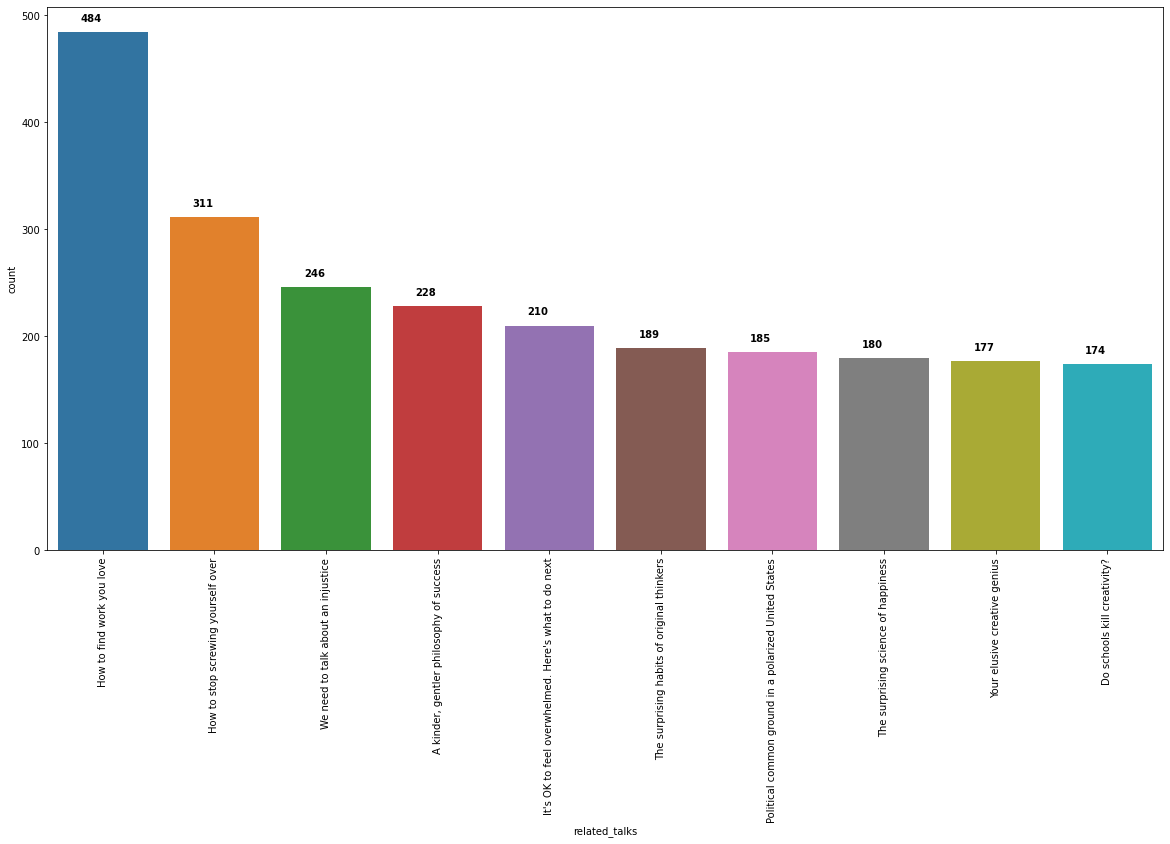

In [254]:
#make a bar plot of the most frequent related talks categories
plt.figure(figsize=(20,10))
sns.barplot(x='related_talks', y='count', data=freq_talks_df)

#set rotation of x-axis labels
plt.xticks(rotation=90)

#show count of each related_talks category
for i, v in enumerate(freq_talks_df['count'].values):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')



Numerical Columns

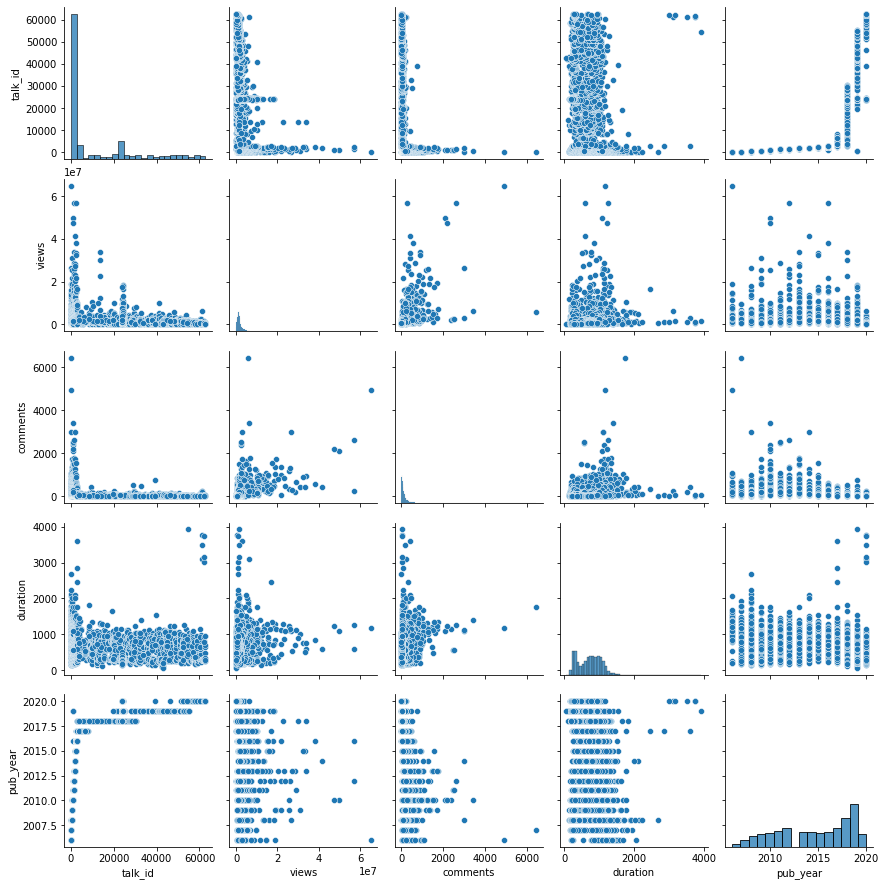

In [255]:
#check correlation with scatterplot
sns.pairplot(df)
plt.show()

views column

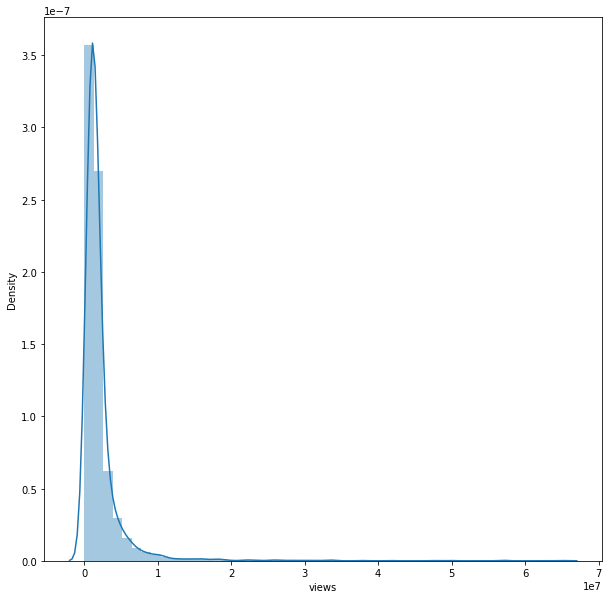

In [256]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers of views with distribution plot
sns.distplot(df['views'])
plt.show()


Rightly skewed

In [257]:
#print skew and kurtosis of views
print("Skew: {}".format(df['views'].skew()))
print("Kurtosis: {}".format(df['views'].kurt()))

Skew: 8.185743853972696
Kurtosis: 98.73791844100452


comments

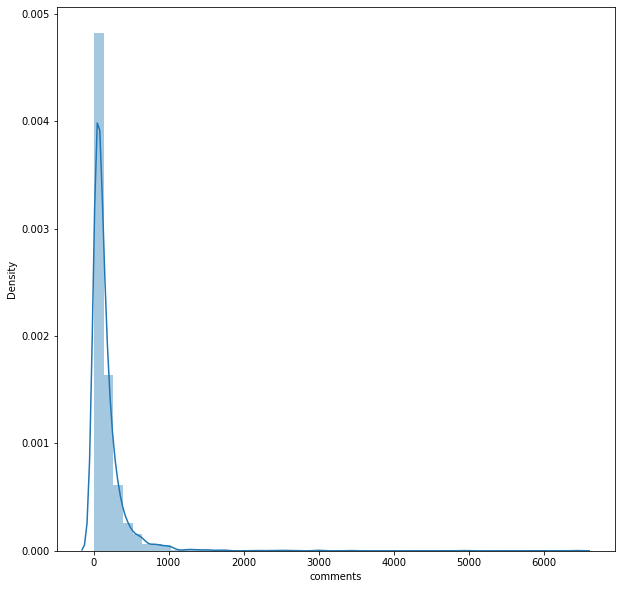

In [258]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers ofcomments with distribution plot
sns.distplot(df['comments'])
plt.show()


rightly skewed

In [259]:
#print skew and kurtosis of comments
print("Skew: {}".format(df['comments'].skew()))
print("Kurtosis: {}".format(df['comments'].kurt()))

Skew: 8.865357174077623
Kurtosis: 143.03538660235935


duration

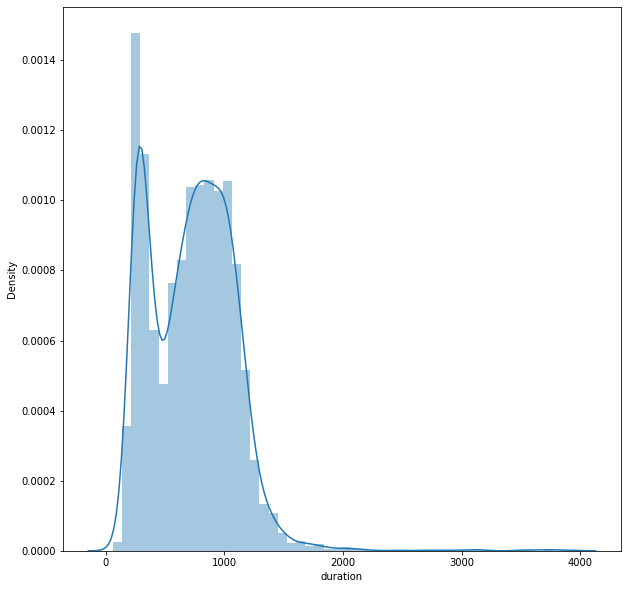

In [260]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers of duration with distribution plot
sns.distplot(df['duration'])
plt.show()


lightly skewed to right

In [261]:
#print skew and kurtosis of duration
print("Skew: {}".format(df['duration'].skew()))
print("Kurtosis: {}".format(df['duration'].kurt()))

Skew: 1.1856084536965332
Kurtosis: 6.84922276591617


feature engineering

Feature engineering is the process of using domain knowledge to extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

In [262]:
#check data in df
df.head()

talk_id                            title  ... pub_month pub_weekday
0        1      Averting the climate crisis  ...      June     Tuesday
1       92  The best stats you've ever seen  ...      June     Tuesday
2        7                 Simplicity sells  ...      June     Tuesday
3       53              Greening the ghetto  ...      June     Tuesday
4       66      Do schools kill creativity?  ...      June     Tuesday

[5 rows x 23 columns]

Feature Engineering on Speaker_1 column

In [263]:
#create a df speaker_1 and mean of views ascending false and sort by mean views
df_speaker_1_views = df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
df_speaker_1_views = df_speaker_1_views.to_dict()
df_speaker_1_views = df_speaker_1_views.values()
df_speaker_1_views = list(df_speaker_1_views)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(df_speaker_1_views)


In [264]:
df['speaker_1_avg_views'].sort_values(ascending=False)

1296    57074270.0
2220    39421820.5
2062    39421820.5
2108    37976820.0
1366    33874546.0
           ...    
3696       10680.0
2753       10356.0
3056           0.0
3068           0.0
4004           0.0
Name: speaker_1_avg_views, Length: 4005, dtype: float64

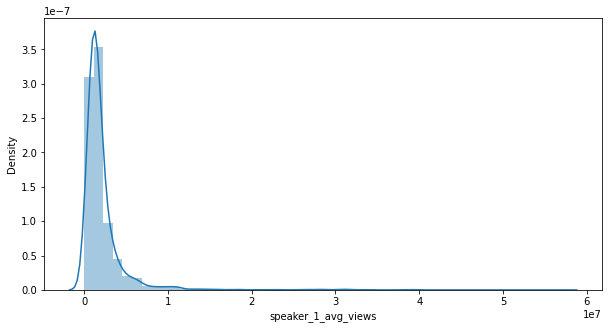

In [265]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

In [266]:
#print skew and kurtosis of speaker_1_avg_views
print("Skew: {}".format(df['speaker_1_avg_views'].skew()))
print("Kurtosis: {}".format(df['speaker_1_avg_views'].kurt()))

Skew: 7.115405827114308
Kurtosis: 73.76388793182939


It is rightly skewed

Feature Engineering on event column

In [267]:
#find unique event in df and save as a list in event_list
event_list = df['event'].unique().tolist()
len(event_list)

459

In [268]:
#apply target encoding to event column and save it in df_event with mean of views ascending false and sort by mean views
df_event = df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
df_event = df_event.to_dict()
df_event = df_event.values()
df_event = list(df_event)[0]
df['event_avg_views']=df['event'].map(df_event)

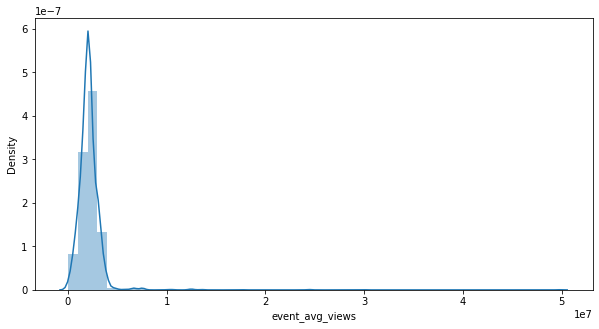

In [269]:
#distribution plot of event_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['event_avg_views'])


In [270]:
#print skew and kurtosis of event_avg_views
print("Skew: {}".format(df['event_avg_views'].skew()))
print("Kurtosis: {}".format(df['event_avg_views'].kurt()))


Skew: 14.4139778252541
Kurtosis: 382.42506115325733


Rightly skewed

Feature Engineering on available_lang column

In [271]:
#apply eval function to available_lang column
df['available_lang'] = df['available_lang'].apply(eval)

In [272]:
len(df['available_lang'][10])

26

In [273]:
#create a new column available_lang_count
df['available_lang_count'] = df['available_lang'].apply(lambda x: len(x))
df['available_lang_count']

0       43
1       49
2       26
3       35
4       62
        ..
4000     1
4001     4
4002     1
4003     1
4004     1
Name: available_lang_count, Length: 4005, dtype: int64

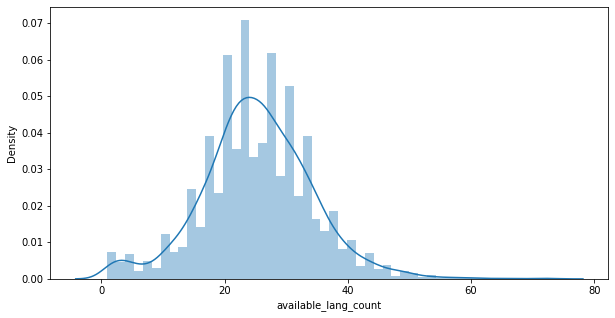

In [274]:
#distribution plot of available_lang_count column
plt.figure(figsize=(10,5))
sns.distplot(df['available_lang_count'])

In [275]:
#print skew and kurtosis of available_lang_count
print("Skew: {}".format(df['available_lang_count'].skew()))
print("Kurtosis: {}".format(df['available_lang_count'].kurt()))


Skew: 0.18591487604734994
Kurtosis: 1.2461367402327443


normal distribution as skewness is less than 1

Feature Engineering on topics column

In [276]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [277]:
#apply eval function to topics column
df['topics'] = df['topics'].apply(eval)

#create a new column topics_count
df['topics_count'] = df['topics'].apply(lambda x: len(x))
df['topics_count']


0        9
1       11
2        9
3        9
4        7
        ..
4000     7
4001     8
4002     5
4003    14
4004     8
Name: topics_count, Length: 4005, dtype: int64

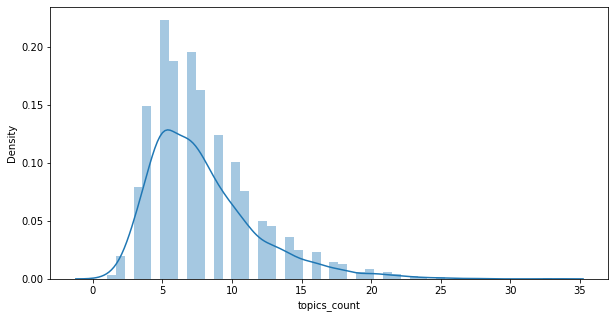

In [278]:
#distribution plot of topics_count column
plt.figure(figsize=(10,5))
sns.distplot(df['topics_count'])


In [279]:
df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [280]:
df['topics'][0]

['alternative energy',
 'cars',
 'climate change',
 'culture',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology']

In [281]:
#for loop to extract unique topics from topics column and save it in topics_list
unique_topics_list = []

for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics_list):
      unique_topics_list.append(ele)
      

In [282]:
#len of unique_topics_list
len(unique_topics_list)

457

In [283]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics_list:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [284]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

In [285]:
se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values
df['topics_wise_avg_views']

0       1750846
1       2290338
2       1915719
3       1642100
4       2904226
         ...   
4000    2134416
4001    2343639
4002    1805407
4003    1978146
4004    1877477
Name: topics_wise_avg_views, Length: 4005, dtype: int64

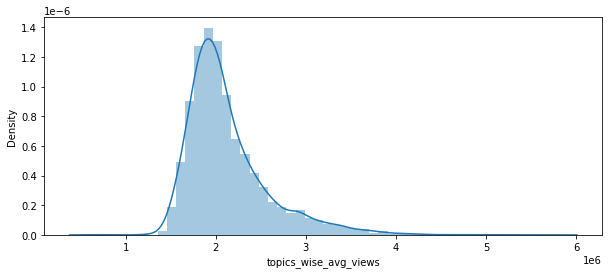

In [286]:
#plotting topics_wise_avg_views
plt.figure(figsize=(10,4))
sns.distplot(df['topics_wise_avg_views'])

Feature Engineering on published_date column.

In [287]:
#create a column name video_age with the difference between the year of upload and the current year
df['video_age'] = 2022-df['pub_year']
df['video_age']

0       16
1       16
2       16
3       16
4       16
        ..
4000     2
4001     2
4002     2
4003     2
4004     2
Name: video_age, Length: 4005, dtype: int64

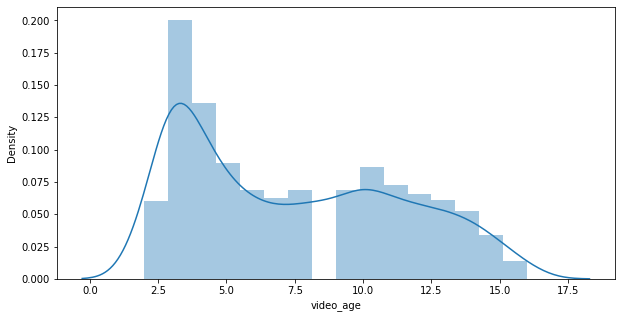

In [288]:
#distribution plot of video_age column
plt.figure(figsize=(10,5))
sns.distplot(df['video_age'])

Feature Engineering on related_talks column.

In [289]:

df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

In [290]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'occupation',
       'pub_year', 'pub_month', 'pub_weekday', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'topics_count',
       'topics_wise_avg_views', 'video_age'],
      dtype='object')

In [291]:
df.head()

talk_id                            title  ... topics_wise_avg_views video_age
0        1      Averting the climate crisis  ...               1750846        16
1       92  The best stats you've ever seen  ...               2290338        16
2        7                 Simplicity sells  ...               1915719        16
3       53              Greening the ghetto  ...               1642100        16
4       66      Do schools kill creativity?  ...               2904226        16

[5 rows x 29 columns]

In [292]:
#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

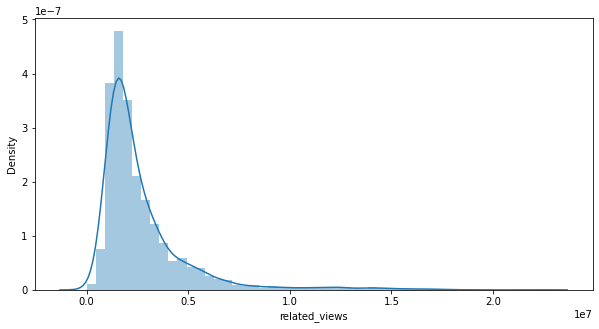

In [293]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

In [294]:
#print skew and kurtosis of related_views
print("Skew: {}".format(df['related_views'].skew()))
print("Kurtosis: {}".format(df['related_views'].kurt()))

Skew: 3.0868691440771343
Kurtosis: 12.461186431786594


rightly skewed

In [295]:
#create a df copy
new_df = df.copy()

In [296]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'occupation',
       'pub_year', 'pub_month', 'pub_weekday', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'topics_count',
       'topics_wise_avg_views', 'video_age', 'related_views'],
      dtype='object')

data cleaning

In [297]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['published_date','url','talk_id','title','speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'event', 'native_lang', 'available_lang' ,'recorded_date','topics','related_talks','transcript', 'occupation' ,'description','pub_year', 'pub_weekday', 'pub_month'],inplace=True)

In [298]:
df.columns

Index(['views', 'comments', 'duration', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'topics_count',
       'topics_wise_avg_views', 'video_age', 'related_views'],
      dtype='object')

remove the outliers

In [299]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

views                    393
comments                 261
duration                  21
speaker_1_avg_views      373
event_avg_views          156
available_lang_count     121
topics_count             116
topics_wise_avg_views    242
video_age                  0
related_views            300
dtype: int64

In [300]:
for i in ['available_lang_count','comments','duration','event_avg_views','related_views','speaker_1_avg_views','topics_wise_avg_views','topics_count','views','topics_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [301]:
#check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

views                    0
comments                 0
duration                 0
speaker_1_avg_views      0
event_avg_views          0
available_lang_count     0
topics_count             0
topics_wise_avg_views    0
video_age                0
related_views            0
dtype: int64

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   views                  4005 non-null   float64
 1   comments               3350 non-null   float64
 2   duration               4005 non-null   float64
 3   speaker_1_avg_views    4005 non-null   float64
 4   event_avg_views        4005 non-null   float64
 5   available_lang_count   4005 non-null   float64
 6   topics_count           4005 non-null   float64
 7   topics_wise_avg_views  4005 non-null   float64
 8   video_age              4005 non-null   int64  
 9   related_views          4005 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 313.0 KB


In [303]:
#seperate the target column
y=df['views']
x=df.drop(columns=['views'])

In [304]:
#do one hot encoding on the categorical columns
x=pd.get_dummies(x)

#check the shape of the dataframe
x.shape

(4005, 9)

In [305]:
#check x dataframe
x.head()

comments  duration  ...  video_age  related_views
0     272.0     977.0  ...         16      1659584.0
1     413.0    1190.0  ...         16      1573950.0
2     124.0    1286.0  ...         16      3051136.0
3     219.0    1116.0  ...         16      1053294.0
4     413.0    1164.0  ...         16      5517750.0

[5 rows x 9 columns]

In [306]:
#view column names
x.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_avg_views',
       'available_lang_count', 'topics_count', 'topics_wise_avg_views',
       'video_age', 'related_views'],
      dtype='object')

Treat nan values

In [307]:
#check nan values
x.isnull().sum()

comments                 655
duration                   0
speaker_1_avg_views        0
event_avg_views            0
available_lang_count       0
topics_count               0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

In [308]:
#create a df of features for using in knn imputer
nan_df=['duration','comments','speaker_1_avg_views','event_avg_views']

# Before applying KNNImputer, we have to scale features to avoid bias.
scaler = MinMaxScaler()

#Import libraries
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(scaler.fit_transform(x[nan_df]))

# transform the dataset
x[nan_df] = imputer.transform(scaler.fit_transform(x[nan_df]))

#again applying inverse_transform on the data
x[nan_df] = scaler.inverse_transform(x[nan_df])

In [309]:
#check nan values
x.isnull().sum()

comments                 0
duration                 0
speaker_1_avg_views      0
event_avg_views          0
available_lang_count     0
topics_count             0
topics_wise_avg_views    0
video_age                0
related_views            0
dtype: int64

In [310]:
#check x dataframe
x.head()

comments  duration  ...  video_age  related_views
0     272.0     977.0  ...         16      1659584.0
1     413.0    1190.0  ...         16      1573950.0
2     124.0    1286.0  ...         16      3051136.0
3     219.0    1116.0  ...         16      1053294.0
4     413.0    1164.0  ...         16      5517750.0

[5 rows x 9 columns]

Transformations

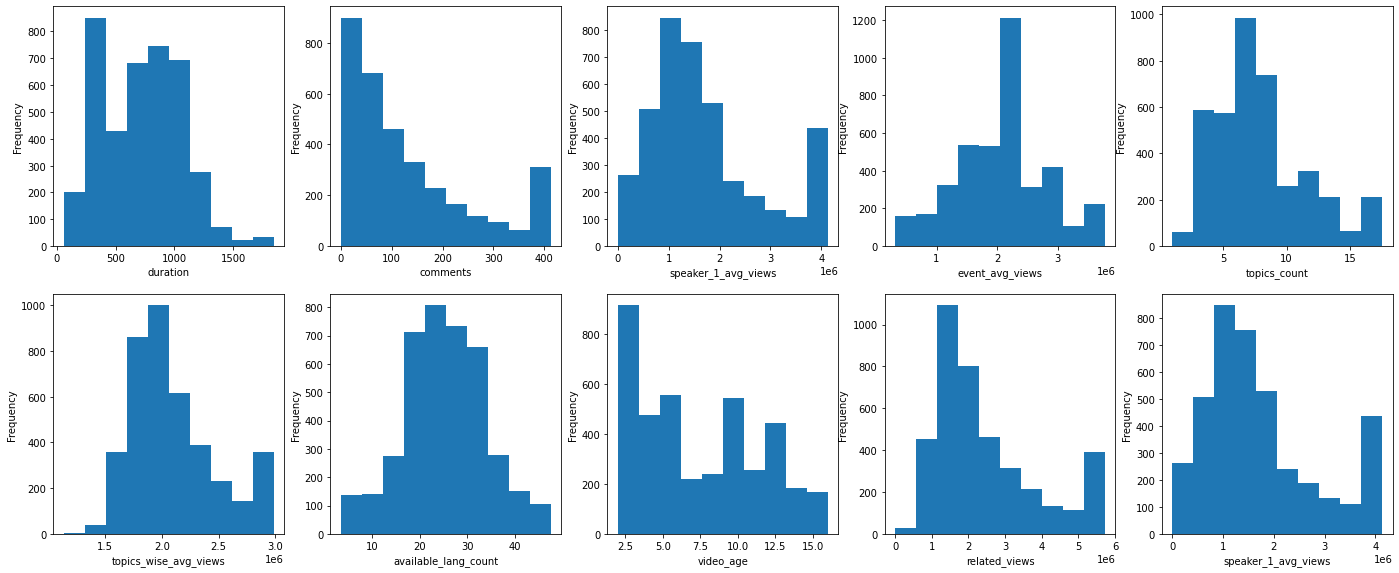

In [311]:
#create a list of numerical columns
num_cols=['duration','comments','speaker_1_avg_views','event_avg_views','topics_count','topics_wise_avg_views','available_lang_count','video_age','related_views','speaker_1_avg_views']

# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(num_cols)):
    var = num_cols[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    df[var].plot(kind = 'hist')

Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

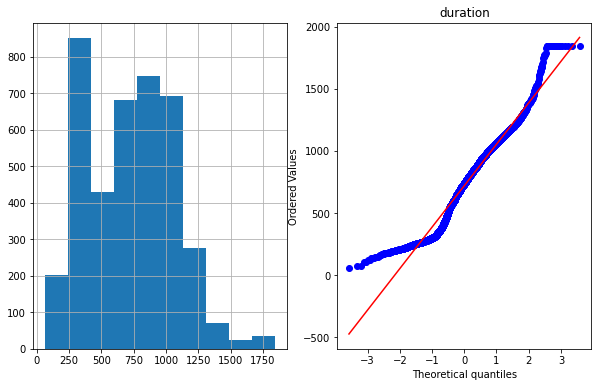

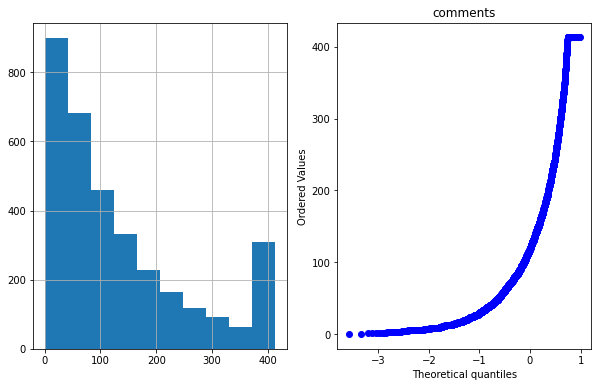

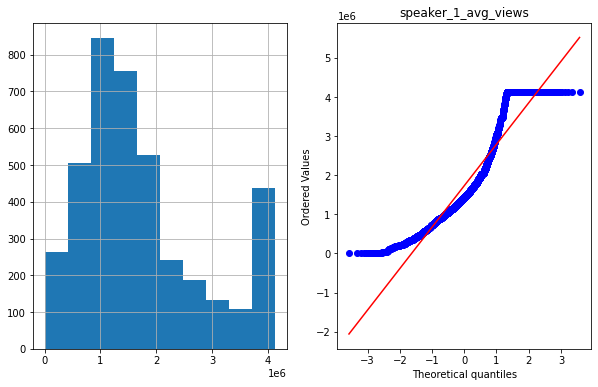

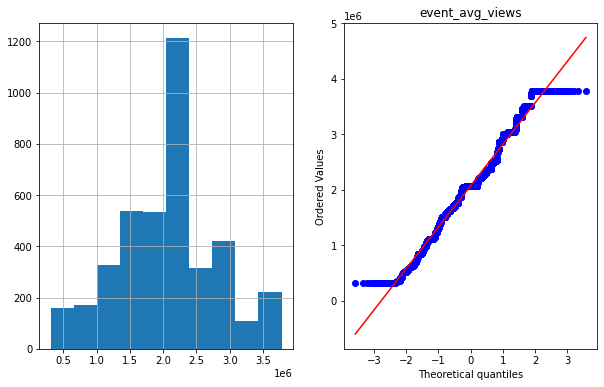

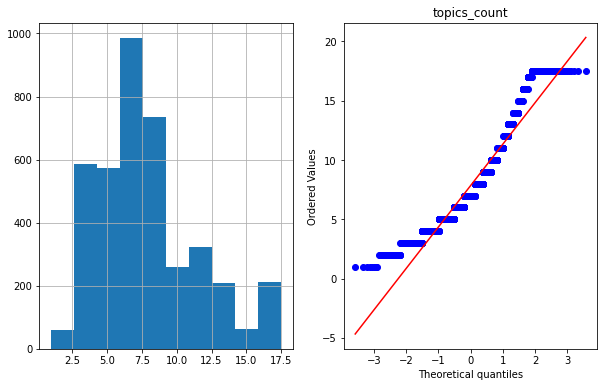

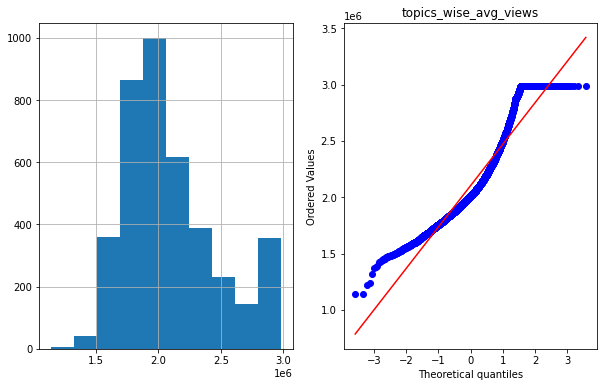

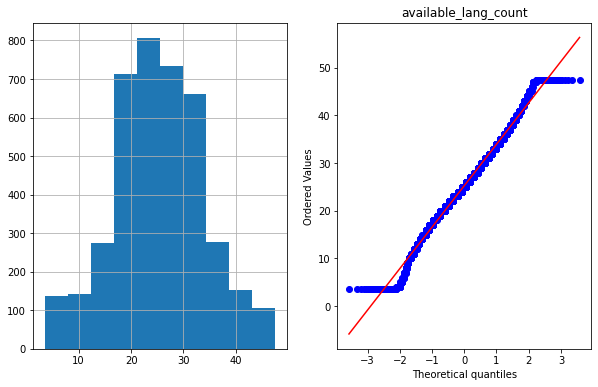

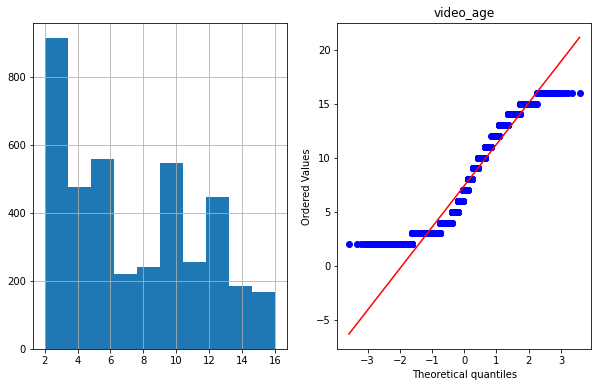

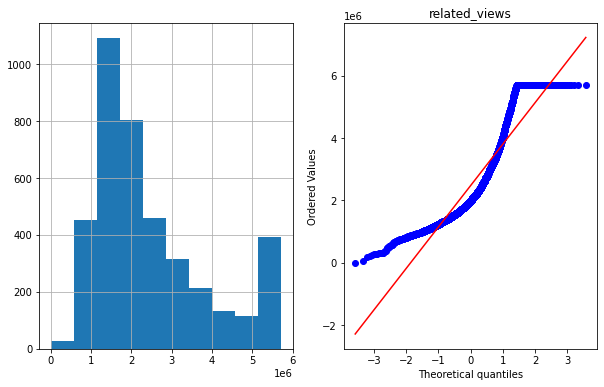

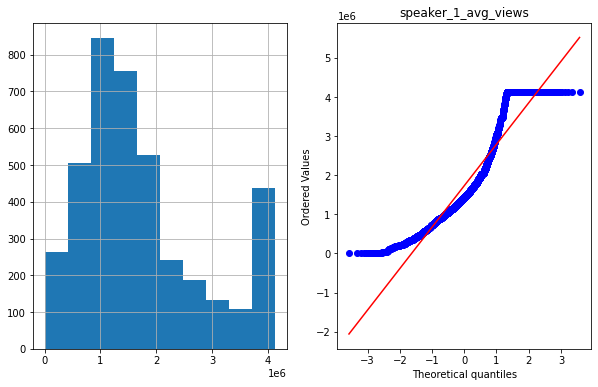

In [312]:
#import libraries
import scipy.stats as stat
import pylab

# Let's plot Q-Q plot for numeric features
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

#create a for loop to apply plot_data function on all the columns in num_cols
for i in range(len(num_cols)):
    var = num_cols[i]
    plot_data(df,var)
 

Now apply transformation to the columns

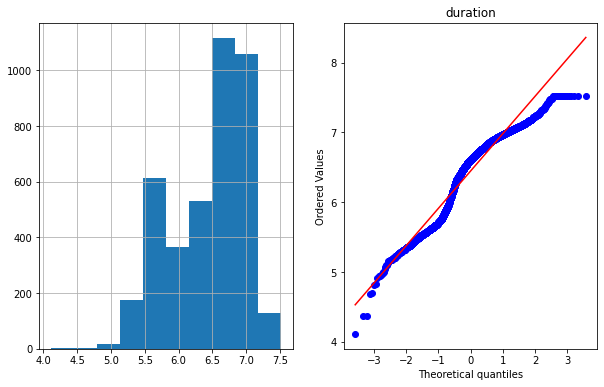

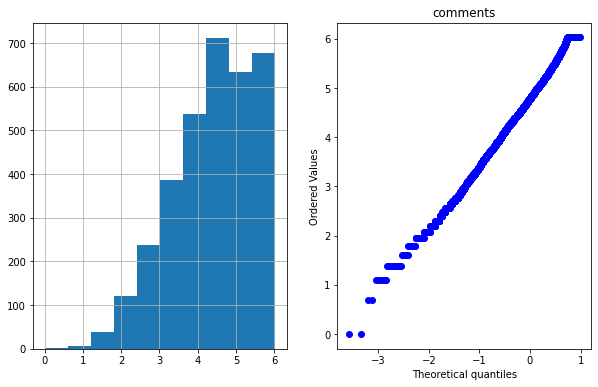

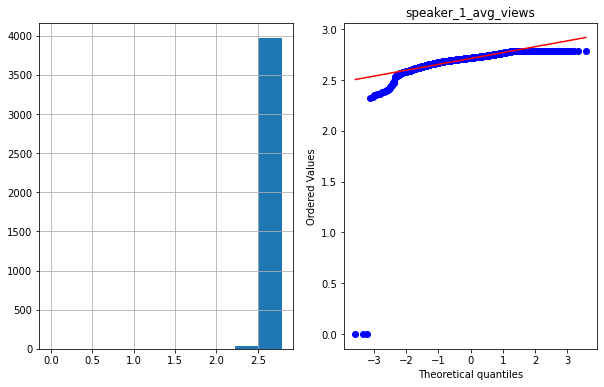

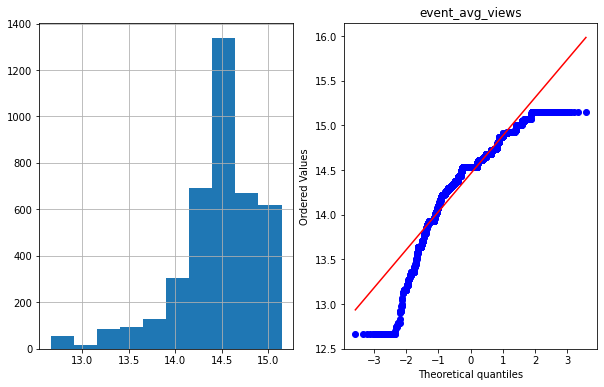

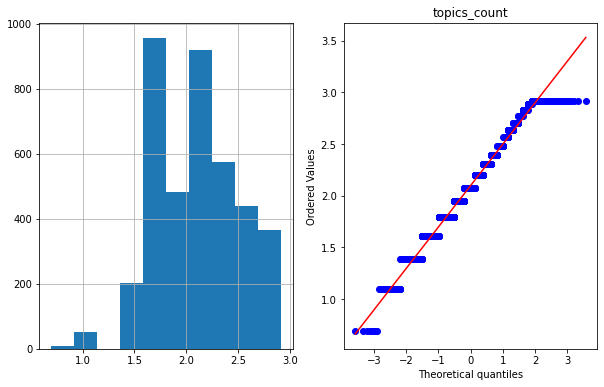

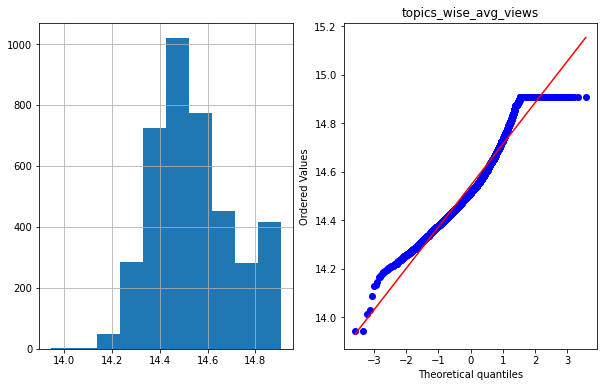

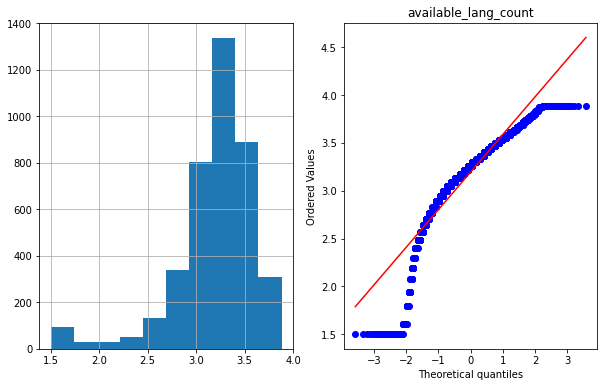

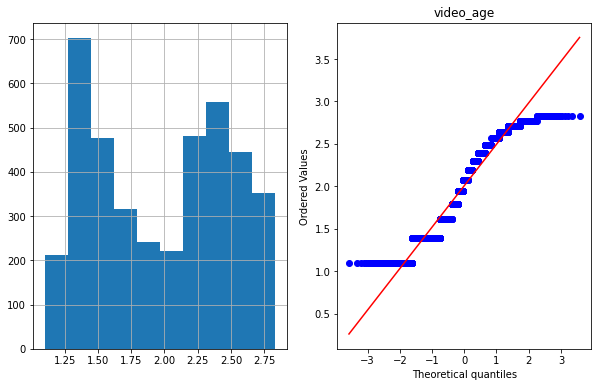

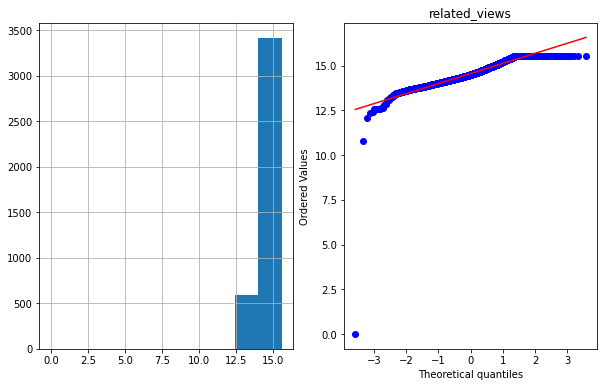

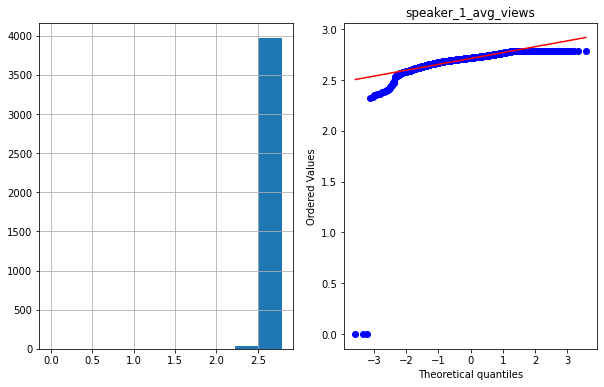

In [313]:
#create a for loop to apply log transformation on all the columns in num_cols
for i in range(len(num_cols)):
    var = num_cols[i]
    df[var]=np.log1p(df[var])


def plot_trans_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

    
#lets plot qq plot for the transformed data
for i in range(len(num_cols)):
    var = num_cols[i]
    plot_trans_data(df,var)
    

Feature Selection

In [314]:
#check the shape of the dataframe
x.shape

(4005, 9)

In [315]:
#feature selection using f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fscores=f_regression(x,y)
fscores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.43117088e+02, 2.22138034e+00, 8.21343686e+02, 7.26280093e-01,
        6.34241154e+02]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        3.67017071e-186, 1.36190106e-001, 1.81039118e-164, 3.94142602e-001,
        4.87581533e-130]))

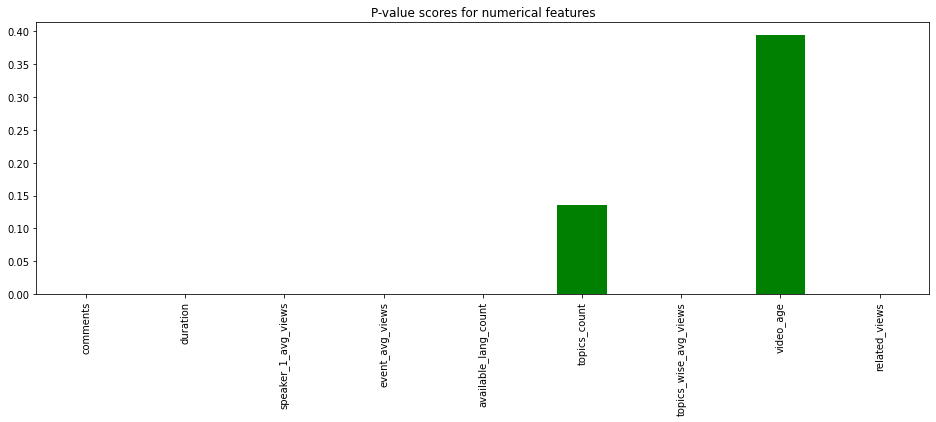

In [316]:
#extract the p-values from the fscores and save as variable and apply pd.Series with index as x.columns

p_values= pd.Series(fscores[1],index= x.columns)
p_values.plot(kind='bar',color='green',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

In [317]:
#create a list of important features
important_features=[]
for i in range(len(fscores[1])):
    if p_values[i]<0.05:
        important_features.append(x.columns[i])

important_features

['comments',
 'duration',
 'speaker_1_avg_views',
 'event_avg_views',
 'available_lang_count',
 'topics_wise_avg_views',
 'related_views']

In [318]:
len(important_features)


7

In [319]:
x=x[important_features]

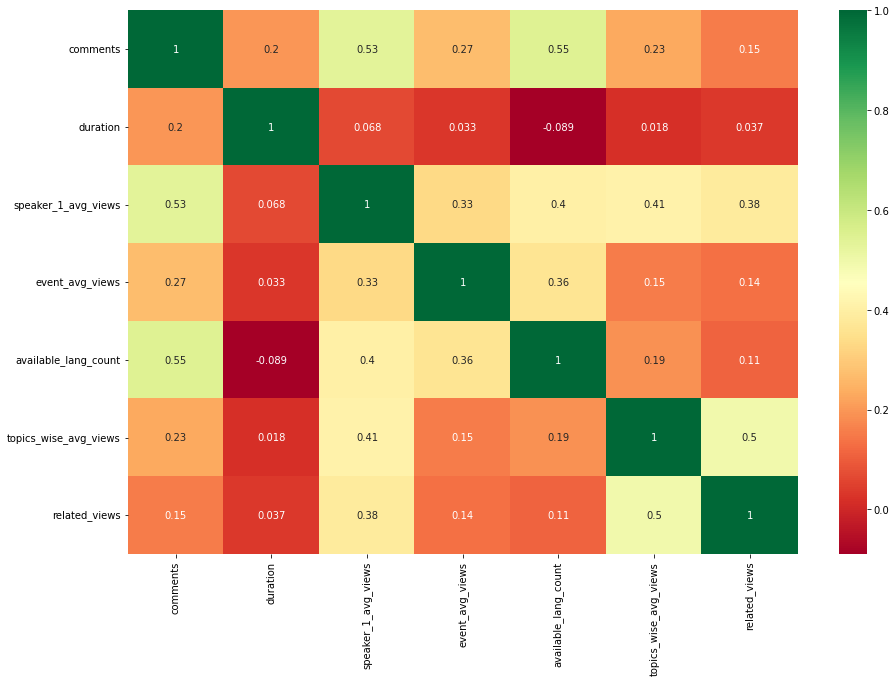

In [320]:
#plot the correlation matrix
corr=x.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn')


In [321]:
#split the dataframe into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Fitting the model and hyeprparameter tuning

linear regression model.

In [322]:
#apply linear regression model
from sklearn.linear_model import LinearRegression

#create a linear regression model
model=LinearRegression()

#fit the model
model.fit(x_train,y_train)

#predict the values of train
y_pred_train=model.predict(x_train)

#predicted values of test
y_pred_test=model.predict(x_test)

#check the accuracy of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#print mean absolute error for train
print('Mean absolute error for train:',mean_absolute_error(y_train,y_pred_train))

#print mean absolute error for test
print('Mean absolute error for test:',mean_absolute_error(y_test,y_pred_test))

#print mean squared error for train
print('Mean squared error for train:',mean_squared_error(y_train,y_pred_train))

#print mean squared error for test
print('Mean squared error for test:',mean_squared_error(y_test,y_pred_test))

#print r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred_train))

#print r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))

Mean absolute error for train: 268846.0032616248
Mean absolute error for test: 261094.06232116366
Mean squared error for train: 225768434006.9707
Mean squared error for test: 220057738659.72025
r2 score for train: 0.81426927660375
r2 score for test: 0.8188779625822167


random forest model.

In [323]:
#apply random forest regressor on default parameters
from sklearn.ensemble import RandomForestRegressor

#create a random forest regressor
model=RandomForestRegressor(criterion='mae')

#fit the model
model.fit(x_train,y_train)

#predict the values of train
y_pred_train=model.predict(x_train)

#predicted values of test
y_pred_test=model.predict(x_test)

#check accuracy of model

#print mean absolute error for train
print('Mean absolute error for train:',mean_absolute_error(y_train,y_pred_train))

#print mean absolute error for test
print('Mean absolute error for test:',mean_absolute_error(y_test,y_pred_test))

#print mean squared error for train
print('Mean squared error for train:',mean_squared_error(y_train,y_pred_train))

#print mean squared error for test
print('Mean squared error for test:',mean_squared_error(y_test,y_pred_test))

#print r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred_train))

#print r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))


Mean absolute error for train: 94979.91538530146
Mean absolute error for test: 232676.8096921797
Mean squared error for train: 56457130384.584694
Mean squared error for test: 248843827797.83792
r2 score for train: 0.9535549612445752
r2 score for test: 0.7951851120342612


Hypermetric tuning using RandomizedSearchCV

In [324]:
#define parameters for the random forest model
parameters={'n_estimators':[30,50,80,100,120,150],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[4,6,8,10,12],
            'min_samples_split':[50,70,90,110,130,150,170,190,210],
            'min_samples_leaf':[10,30,50,70]}

#hyperparameter tuning using random search cv
from sklearn.model_selection import RandomizedSearchCV

#create a random forest model
rf_model=RandomForestRegressor(criterion='mae')

#create a random search cv object
rf_random=RandomizedSearchCV(rf_model,param_distributions=parameters,verbose=0,cv=5)

#fit the model
rf_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 30, 50, 70],
                                        'min_samples_split': [50, 70, 90, 110,
                                                              130, 150, 170,
                                                              190, 210],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

find the optimal best_estimator_

In [325]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model


RandomForestRegressor(criterion='mae', max_depth=10, max_features='sqrt',
                      min_samples_leaf=50, min_samples_split=90,
                      n_estimators=80)

In [326]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(x_train)
y_test_pred = rf_optimal_model.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 300667.95
Test MAE: 311620.39


In [327]:
#make predictions of test data
y_pred_test=rf_optimal_model.predict(x_test)

#print the r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred))

#print the r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))

#print adjusted r2 score for test
print('adjusted r2 score for test:',r2_score(y_test,y_pred_test,sample_weight=None))

r2 score for train: 0.8119802636008386
r2 score for test: 0.7953338719815691
adjusted r2 score for test: 0.7953338719815691


defining model

In [328]:
#defining the model
from sklearn.ensemble import RandomForestRegressor

#create a random forest model with best_estimator_
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=8,min_samples_leaf=30,min_samples_split=90,n_estimators=150,random_state=None)]
      ]

#run the model and store the results in a dataframe
results=pd.DataFrame(columns=['Model','MAE_train','MAE_test','r2_train','r2_test','rmse_train','rmse_test'])

#loop through the models
for i in range(0,len(model)):
    #fit the model
    model[i][1].fit(x_train,y_train)
    #predict the values of train
    y_pred_train=model[i][1].predict(x_train)
    #predict the values of test
    y_pred_test=model[i][1].predict(x_test)
    #calculate the mean absolute error for train
    mae_train=metrics.mean_absolute_error(y_train,y_pred_train)
    #calculate the mean absolute error for test
    mae_test=metrics.mean_absolute_error(y_test,y_pred_test)
    #calculate the r2 score for train
    r2_train=r2_score(y_train,y_pred_train)
    #calculate the r2 score for test
    r2_test=r2_score(y_test,y_pred_test)
    #calculate the rmse for train
    rmse_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    #calculate the rmse for test
    rmse_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    #store the results in a dataframe
    results.loc[i]=[model[i][0],mae_train,mae_test,r2_train,r2_test,rmse_train,rmse_test]


In [329]:
results

Model      MAE_train  ...     rmse_train      rmse_test
0  RandomForest   187827.500509  ...  486385.706371  489890.967601

[1 rows x 7 columns]

Feature Importance

Text(0.5, 1.0, 'Feature Importances for Random Forest')

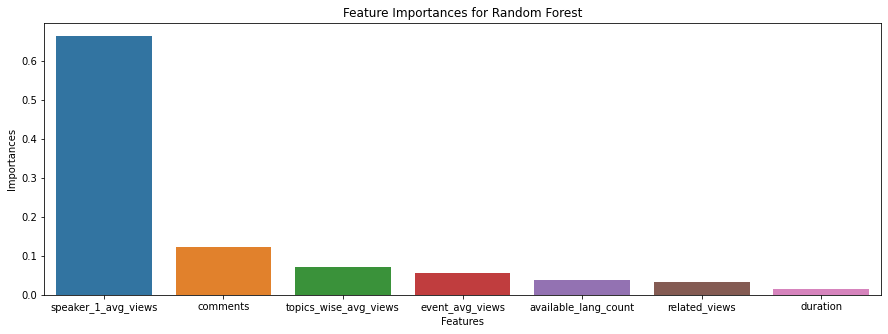

In [330]:
#create datafrsme with columns features as x.columns and importances as rf_optimal_model.feature_importances_
importances=pd.DataFrame({'Features':x.columns,'Importances':rf_optimal_model.feature_importances_})

#sort the dataframe by importances and axis is index and ascending is false
importances.sort_values(by=['Importances'],axis='index', ascending=False, inplace=True)

#set figure size
plt.figure(figsize=(15,5))

#barplot the importances
sns.barplot(x='Features', y='Importances', data=importances)

#set the x and y labels
plt.xlabel('Features')
plt.ylabel('Importances')

#set the title
plt.title('Feature Importances for Random Forest')

XGBoost Regressor Model

In [331]:
#define hyperparameters for the xgboost model
parameters={'n_estimators':[30,50,80,100,120,150],
            'max_depth':[4,6,8,10,12],
            'min_samples_split':[50,70,90,110,130,150,170,190,210],
            'min_samples_leaf':[10,30,50,70]}

#hyperparameter tuning using random search cv
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

#create a random forest model
xg_model=XGBRegressor(criterion='mae')

#create a random search cv object
xg_random=RandomizedSearchCV(xg_model,param_distributions=parameters,verbose=0,cv=5)

#fit the model
xg_random.fit(x_train,y_train)

[00:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 50, 70],
                                        'min_samples_split': [50, 70, 90, 110,
                                                              130, 150, 170,
                                                              190, 210],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [332]:
#finding the optimal model w.r.t. best_estimator_
xg_optimal_model = xg_random.best_estimator_
xg_optimal_model

XGBRegressor(criterion='mae', max_depth=4, min_samples_leaf=30,
             min_samples_split=50, n_estimators=80)

In [333]:
#make predictions of test data
y_pred_test=xg_optimal_model.predict(x_test)

#print the r2 score for train
print('r2 score for train:',r2_score(y_train,y_pred))

#print the r2 score for test
print('r2 score for test:',r2_score(y_test,y_pred_test))

#print adjusted r2 score for test
print('adjusted r2 score for test:',r2_score(y_test,y_pred_test,sample_weight=None))

r2 score for train: 0.8119802636008386
r2 score for test: 0.8290232357169577
adjusted r2 score for test: 0.8290232357169577


In [334]:
#defining the model
from sklearn.ensemble import RandomForestRegressor

#create a random forest model with best_estimator_
model =[
    ['XGBoost ',XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0,importance_type=None, learning_rate=0.300000012, max_depth=4,
             min_samples_leaf=10, min_samples_split=50, n_estimators=150, n_jobs=4)]
]

#run the model and store the results in a dataframe results_df_xgb
results_df_xgb=pd.DataFrame(columns=['Model','MAE_train','MAE_test','r2_train','r2_test','rmse_train','rmse_test'])

#loop through the models
for i in range(0,len(model)):
    #fit the model
    model[i][1].fit(x_train,y_train)
    #predict the values of train
    y_pred_train=model[i][1].predict(x_train)
    #predict the values of test
    y_pred_test=model[i][1].predict(x_test)
    #calculate the mean absolute error for train
    mae_train=metrics.mean_absolute_error(y_train,y_pred_train)
    #calculate the mean absolute error for test
    mae_test=metrics.mean_absolute_error(y_test,y_pred_test)
    #calculate the r2 score for train
    r2_train=r2_score(y_train,y_pred_train)
    #calculate the r2 score for test
    r2_test=r2_score(y_test,y_pred_test)
    #calculate the rmse for train
    rmse_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    #calculate the rmse for test
    rmse_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    #store the results in a dataframe
    results_df_xgb.loc[i]=[model[i][0],mae_train,mae_test,r2_train,r2_test,rmse_train,rmse_test]

#print the results
results_df_xgb


[00:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model      MAE_train  ...     rmse_train      rmse_test
0  XGBoost   103147.812151  ...  169837.507666  502379.329263

[1 rows x 7 columns]

Feature Importance

Text(0.5, 1.0, 'Feature Importances score for XGBoost')

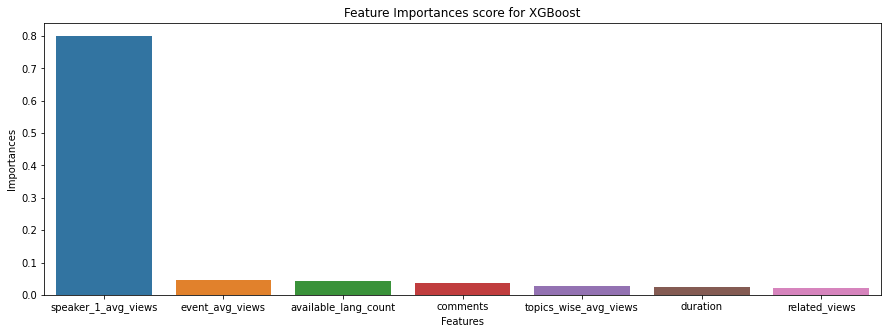

In [335]:
#create datafrsme with columns features as x.columns and importances as xg_optimal_model.feature_importances_
importances=pd.DataFrame({'Features':x.columns,'Importances':xg_optimal_model.feature_importances_})

#sort the dataframe by importances and axis is index and ascending is false
importances.sort_values(by=['Importances'],axis='index', ascending=False, inplace=True)

#set figure size
plt.figure(figsize=(15,5))

#barplot the importances
sns.barplot(x='Features', y='Importances', data=importances)

#set the x and y labels
plt.xlabel('Features')
plt.ylabel('Importances')

#set title
plt.title('Feature Importances score for XGBoost')

Defining the all models

In [336]:
#defining all the models

models = [
            ['LinearRegression', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=8,min_samples_leaf=30,min_samples_split=90,n_estimators=150,random_state=None)],    
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0,importance_type=None, learning_rate=0.300000012, max_depth=4,
             min_samples_leaf=10, min_samples_split=50, n_estimators=150, n_jobs=4)]          
        ]

In [337]:
#run all the models and store the results in a dataframe results_df_all
results_df_all=pd.DataFrame(columns=['Model','MAE_train','MAE_test','r2_train','r2_test','rmse_train','rmse_test'])

#loop through the models
for i in range(0,len(models)):
    #fit the model
    models[i][1].fit(x_train,y_train)
    #predict the values of train
    y_pred_train=models[i][1].predict(x_train)
    #predict the values of test
    y_pred_test=models[i][1].predict(x_test)
    #calculate the mean absolute error for train
    mae_train=metrics.mean_absolute_error(y_train,y_pred_train)
    #calculate the mean absolute error for test
    mae_test=metrics.mean_absolute_error(y_test,y_pred_test)
    #calculate the r2 score for train
    r2_train=r2_score(y_train,y_pred_train)
    #calculate the r2 score for test
    r2_test=r2_score(y_test,y_pred_test)
    #calculate the rmse for train
    rmse_train=np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
    #calculate the rmse for test
    rmse_test=np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    #store the results in a dataframe
    results_df_all.loc[i]=[models[i][0],mae_train,mae_test,r2_train,r2_test,rmse_train,rmse_test]



[00:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Results

In [338]:
#print the results
results_df_all

Model      MAE_train  ...     rmse_train      rmse_test
0       LinearRegression  268846.003262  ...  475150.959177  469103.121563
1                Lasso:   268845.979587  ...  475150.959177  469103.117093
2                Ridge:   268845.924378  ...  475150.959177  469103.103202
3  KNeighborsRegressor:   231054.636746  ...  417516.848940  512868.181145
4          RandomForest   187341.369692  ...  486348.161894  489242.652464
5         XGBRegressor:   103147.812151  ...  169837.507666  502379.329263

[6 rows x 7 columns]